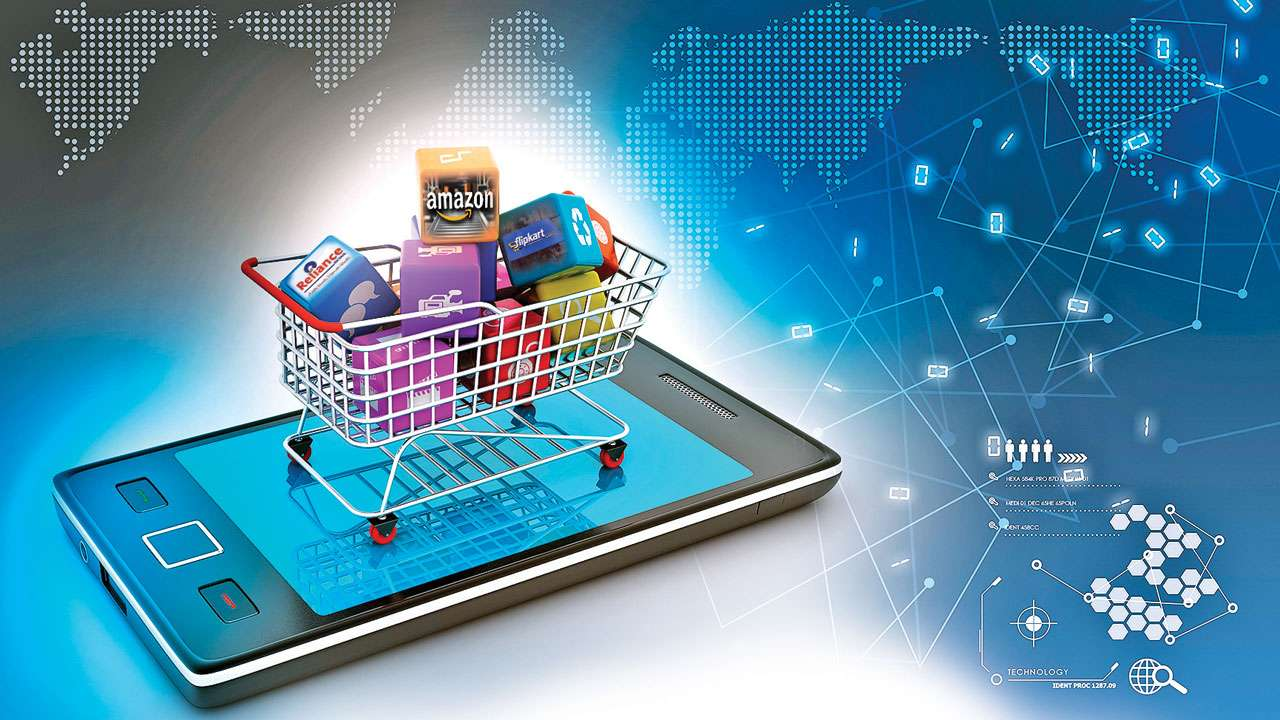




# Project Description

## The Challenge

You are part of a Data Scientists team from the All In One Place company, that needs to determine who are the clients eligible to participate of the “Insiders Program”. With this clients list on hand, the marketing team will a sequency of a custom and exclusive actions for this group, in order to rise the revenues and the purchase frequency. 
As result for this project is expected that you deliver a list with eligible clients to participate of the “Insiders Program”, as well a report answering the following questions:

1. Who are the elegible people to participate in the “Insiders Program”?
2. How many clients will be part of the group?
3. Which are the main caracteristics for the group?
4. Which is the revenues percentage that comes from the group?
5. Which are the expected revenues from this group for the next months?
6. Which are the conditions to a client be eligible for the “Insiders”?
7. Which are the conditions to a client be removed from the “Insiders”?
8. Which are the guarantees that the “Insiders Program” is better than the rest of the base?
9. Which actions the marketing team can perform in order to improve the income?

## The Data

The data set is available on the Kaggle platform, through this link:

https://www.kaggle.com/vik2012kvs/high-value-customers-identification

Each row represents a sell transaction that happened between November 2016 and December 2017. The dataset includes the following informations:

• **Invoice Number:** unique id from each purchase.

• **Stock Code Product:** item code.

• **Description Product:** item name.

• **Quantity:** the quantity of each item purchased per transaction.

• **Invoice Date:** the day that the purchase occurred.

• **Unit Price:** product price per unit.

• **Customer ID:** client id.

• **Country:** the client country.

## Soluction Planning

### IOT Planning

#### Input



1. Businnes Problem
    - Select the high value customers.
    
2. Dataset.
    - Sales in a 1 year period.

#### Output



1. Customers identification for Insiders Program.
    - Insiders Programs Customers list.
    
2. Report.
    - Businnes questions answers. 
    
        1. Who are the elegible people to participate in the “Insiders Program”?
        2. How many clients will be part of the group?
        3. Which are the main caracteristics for the group?
        4. Which is the revenues percentage that comes from the group?
        5. Which are the expected revenues from this group for the next months?
        6. Which are the conditions to a client be eligible for the “Insiders”?
        7. Which are the conditions to a client be removed from the “Insiders”?
        8. Which are the guarantees that the “Insiders Program” is better than the rest of the base?
        9. Which actions the marketing team can perform in order to improve the income?

#### Tasks

1. Who are the elegible people to participate in the “Insiders Program”?
    - What is a "elegible customer" for the businnes?
        - Revenues
            - High AVG Ticket (AVG purchase value)
            - High LTV (Total purchase values)
            - Low recence (how oft the customer make a purchase)
            - High basket size.
            - Low churning probability.
            - High LTV prediction.
            - High propensity to buy.
            
        - Cost
            - Low return rate.
                        
        - Shopping experience
            - High AVG evaluation.
            
            
            
2. How many clients will be part of the group?
    - There is a limit of customer for the Insiders Program?
    - GRoup percentage.
    
    
3. Which are the main caracteristics for the group?
    - Age.
    - Location.
    - See question 1
    
4. Which is the revenues percentage that comes from the group?
    - Total year revenues.
    - Total Insiders group revenues.
    - Comparation.
    
5. Which are the expected revenues from this group for the next months?
    - Insiders group LVT.
    - Cohort analysis - time customer marker.

6. Which are the conditions to a client be eligible for the “Insiders”?
    - Define the model frequency 1, month, 2?, 3?)
    - The customers must to be similar
    
7. Which are the conditions to a client be removed from the “Insiders”?
    - Define the model frequency 1, month, 2?, 3?)
    - The customers must to be dissimilar from insiders.
    
8. Which are the guarantees that the “Insiders Program” is better than the rest of the base?
    - A/B test
    - A/B Beysian test 
    - Hipotesys tests.
9. Which actions the marketing team can perform in order to improve the income?
    - Discount.
    - Buy preference.
    - Free deliver.

#### Benchmark Solutions

1. Desk Research

    1. RFM Model
        - Recency
            - Time since the last purchase.
            - Responsivity.
           
        - Frequency
            - Avg time between transactions.
            - Engagement
            
        - Monetary
            - Total spend, revenues.
            - High value purchases.
            
Step 1
    - Order the groups by a feature.
    
Step 2
    - Divided the customers according to notes.
        - Notes between 1 - 5.
        - 5 groups
        
Step 3
    - Same as step  with other feature.
    
Step 4
    - Do the same with the last feature.
    
Step 5
    - Do the mean between the features scores.
    
    2. RFM Model segmentation
        Categorize customers by the RFM model.

# Imports, Configurations and Helper Functions

## Imports

In [1]:
import dash
import plotly
import random
import warnings
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import umap.umap_ as umap
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from pandasql import sqldf
from IPython.display import HTML
from sklearn.manifold import TSNE
from pandas_profiling import ProfileReport
from yellowbrick.cluster import KElbowVisualizer, silhouette_visualizer
from sklearn.cluster import KMeans, DBSCAN, MeanShift, estimate_bandwidth
from sklearn.preprocessing import StandardScaler, Normalizer, RobustScaler, MinMaxScaler
from sklearn.metrics import silhouette_samples, silhouette_score, davies_bouldin_score, calinski_harabasz_score, silhouette_samples

## Configurations

In [2]:
warnings.filterwarnings('ignore')

SEED = 43

%matplotlib inline
%pylab inline

plt.style.use('bmh')
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams['font.size'] = 18

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.set_option('display.expand_frame_repr', False)

sns.set()

plotly.offline.init_notebook_mode(connected=True)
plotly.offline.iplot

pd.options.display.float_format = '{:.2f}'.format
pd.options.display.max_rows = 300
pd.options.display.max_columns = 50

Populating the interactive namespace from numpy and matplotlib


## Helper Functions

In [3]:
# Function to plot graphs titles and labels 
def info_plot(title, xlabel, ylabel):
    plt.title(title, fontsize = 18)
    plt.xlabel(xlabel, fontsize = 14)
    plt.ylabel(ylabel, fontsize = 14)

# Function to plot values upside the barplot
def annot_plot(plot):
    for p in plot.patches:
        plot.annotate(format(int(p.get_height())), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 9), 
                       textcoords = 'offset points',
                       fontsize = 14)
    return None

# Function that plots the silhouette score graphs.
def silhouette_plot(df, model):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(df) + (len(np.unique(model.labels_)) + 1) * 10])

    silhouette_avg = silhouette_score(df, model.fit_predict(df))
    print(f"For n_clusters = {len(np.unique(model.labels_))}.\n\nThe average silhouette_score is : {silhouette_avg}.")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df, model.fit_predict(df))

    y_lower = 10
    for i in range(len(np.unique(model.labels_))):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / len(np.unique(model.labels_)))
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(model.fit_predict(df).astype(float) / len(np.unique(model.labels_)))
    ax2.scatter(df.values[:, 0], df.values[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    # Labeling the clusters
    centers = model.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle((f"Silhouette analysis for Mean Shift clustering. (n_clusters = {len(np.unique(model.labels_))})"),fontsize=14, fontweight='bold')

    plt.show()

# Load Data

In [4]:
# Load data
data_path = r'C:\Users\felip\repos\pa005_insiders_clustering\insiders_clustering\data\raw\Ecommerce.csv'

df_init = pd.read_csv(data_path)
df_init.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Unnamed: 8
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.00,United Kingdom,NaN
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.00,United Kingdom,NaN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.00,United Kingdom,NaN
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.00,United Kingdom,NaN
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.00,United Kingdom,NaN


# Data Fist Look

In [5]:
print(f'\nROWS: {df_init.shape[0]}\n\nCOLUMNS: {df_init.shape[1]}.\n')


ROWS: 541909

COLUMNS: 9.



In [6]:
# NaN check

df_init.isna().sum()

# Drop NaN
# df_init.dropna(subset = ['Description', 'CustomerID'])

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
Unnamed: 8     541909
dtype: int64

In [7]:
# Data Types 

df_init.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
Unnamed: 8     float64
dtype: object

In [8]:
# Descriptive statistics

df_init.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.00,9.55,218.08,-80995.00,1.00,3.00,10.00,80995.00
UnitPrice,541909.00,4.61,96.76,-11062.06,1.25,2.08,4.13,38970.00
CustomerID,406829.00,15287.69,1713.60,12346.00,13953.00,15152.00,16791.00,18287.00
Unnamed: 8,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Pandas Proffiling

report1 = ProfileReport(df_init, 'Insiders Program Dataset Report.')
report1

Summarize dataset:   0%|          | 0/17 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## First Look Summary.

<span style="color:blue">1. The columns "Unnamed: 8" have no value to the dataset and should be droped.<span>
    
<span style="color:blue">2. The columns are in a weird order - reorder the columns..<span>
    
<span style="color:blue">3. The column "InvoiceDate" should be "DATE" type.<span>
    
<span style="color:blue">4. The columns "InvoiceNo" should be "INT" type.<span>
    
<span style="color:blue">5. There are some NaN values at the "Description" and "CustomerID".<span>   
    
<span style="color:blue">6. Check for discrepant information and outliers<span>
    
<span style="color:blue">7. Remove some other weird things that impacts the future datasets<span>
    
<span style="color:blue">8. 2nd cycle - Exclude negative quantityes values from dataset <span>

# Data Cleaning

In [10]:
df_init_2 = df_init.copy()

### <span style="color:blue">1. The columns "Unnamed: 8" have no value to the dataset and should be droped.<span> - DONE

In [11]:
df_init_2.drop(columns = 'Unnamed: 8', inplace = True)

### <span style="color:blue">2. The columns are in a weird order - reorder the columns.<span> - DONE

In [12]:
df_init_2 = df_init_2[['CustomerID', 'Country', 'InvoiceDate','InvoiceNo', 'Description', 'UnitPrice', 'StockCode', 'Quantity']]

### <span style="color:blue">3. The column "InvoiceDate" should be "DATE" type.<span> - DONE

In [13]:
df_init_2['InvoiceDate'] = pd.to_datetime(df_init_2['InvoiceDate'])

In [14]:
df_init_2.dtypes

CustomerID            float64
Country                object
InvoiceDate    datetime64[ns]
InvoiceNo              object
Description            object
UnitPrice             float64
StockCode              object
Quantity                int64
dtype: object

### <span style="color:blue">4. The columns "InvoiceNo" should be "INT" type.<span> - DONE
    
    - It was found some codes like "C536379" and it cant be directly tranformed into "INT" type.
    - The "C" before the numbers represents a "Discount" description.
    - It was separated the letter in the code from the numbers and creted a separated column for them - maybe they can be important later.
        - Column "some_code": 
    
        X - there was no letter before the number code.
        [C, A] - The letter code before the number.
    

In [15]:
len(df_init_2[df_init_2['Quantity'] < 0])

10624

In [16]:
print(f'There are {len(df_init_2.set_index("Description").loc["Discount"])} rows with "Discount" InvoiceNo "C" code, and maybe other types of InvoiceNo with letters')

There are 77 rows with "Discount" InvoiceNo "C" code, and maybe other types of InvoiceNo with letters


In [17]:
print(f'There are {len(df_init_2["Description"].unique())} diferent unique products descriptions.')
print(f'There are {len(df_init_2["StockCode"].unique())} diferent unique stock codes.')
print(f'There are {len(df_init_2["InvoiceNo"].unique())} diferent unique Invoice Numbers.')

There are 4224 diferent unique products descriptions.
There are 4070 diferent unique stock codes.
There are 25900 diferent unique Invoice Numbers.


In [18]:
normal = []
not_normal = []

for x in df_init_2['InvoiceNo']:
    if len(x) == 6:
        normal.append(x)
    else:
        not_normal.append(x)

In [19]:
print(f'There are {len(not_normal)} "InvoiceNo" with some letter before the numbers')

There are 9291 "InvoiceNo" with some letter before the numbers


In [20]:
# Created the "SOME_CODE" column, to split the "InvoiceNo" from some code before the numbers.

df_init_2['some_code'] = df_init_2['InvoiceNo'].apply(lambda x: "X" if len(x) == 6 else x[0])

In [21]:
# Separated the code (letter) before some "InvouceNo" from the number itself.

df_init_2['InvoiceNo'] = df_init_2['InvoiceNo'].apply(lambda x: x if len(x) == 6 else x[1:])

In [22]:
df_init_2['some_code'].value_counts()

X    532618
C      9288
A         3
Name: some_code, dtype: int64

In [23]:
# Tranformed df_init_2['InvoiceNo'] into INTEGER.

df_init_2['InvoiceNo'] = df_init_2['InvoiceNo'].astype(int)

In [24]:
print(f'There are {len(df_init_2[df_init_2["UnitPrice"] < 0])} negative prices at the dataset.')

There are 2 negative prices at the dataset.


In [25]:
print(f'There are {len(df_init_2[df_init_2["Quantity"] < 0])} rows with negative quantity.')

There are 10624 rows with negative quantity.


### <span style="color:blue">5. There are some NaN values at the "Description" and "CustomerID".<span> - DONE
    
    - There are 135080 NaNs at the CustomerID column, almost 25% of all the dataset.
    
    OPTIONS:
    - input an ID for these customers based on the invoice number - each invoice number belongs to a customer.
    
    FINAL DECISION:
    - After some analysis, it was understood that the NaN values at the columns CustomerID and Description are not relevant for the future clustering model training. 
      It was decided to mantein the rows with NaN values.

In [26]:
df_init_2.isna().sum()

CustomerID     135080
Country             0
InvoiceDate         0
InvoiceNo           0
Description      1454
UnitPrice           0
StockCode           0
Quantity            0
some_code           0
dtype: int64

In [27]:
# NaN CustomerID

print(f'There are {df_init_2["CustomerID"].isna().sum()} rows with no data at the CustomerID column - ' 
      f'{round(df_init_2["CustomerID"].isna().sum()/len(df_init_2)*100, 2)}% of all dataset.')

There are 135080 rows with no data at the CustomerID column - 24.93% of all dataset.


In [28]:
# Unique values

print(f'There are {len(df_init_2["CustomerID"].unique())} unique customers ID in the dataset.')
print(f'\nThere are {len(df_init_2["InvoiceNo"].unique())} invoice numbers in the dataset.')
print(f'\nThere are an average of {len(df_init_2["InvoiceNo"].unique()) / len(df_init_2["CustomerID"].unique()):.2f} Invoice No for each CustomerID')

There are 4373 unique customers ID in the dataset.

There are 25900 invoice numbers in the dataset.

There are an average of 5.92 Invoice No for each CustomerID


### <span style="color:blue">6. Check for discrepant information and outliers - DONE<span>
    
    - many of the data are not sales themselves, they can be shipping, postage, and other situations that are not sales.
   ~~- 14107 rows were excluded - 2.6% of the dataset.~~
    
    - "Negative quantity" are devolution and should be maintained in the dataset, so we will return them to the dataset.

In [29]:
df_init_2.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,406829.00,15287.69,1713.60,12346.00,13953.00,15152.00,16791.00,18287.00
InvoiceNo,541909.00,559946.97,13421.29,536365.00,547896.00,560601.00,571779.00,581587.00
UnitPrice,541909.00,4.61,96.76,-11062.06,1.25,2.08,4.13,38970.00
Quantity,541909.00,9.55,218.08,-80995.00,1.00,3.00,10.00,80995.00


In [30]:
print(f'There are {len(df_init_2[df_init_2["UnitPrice"] < 0])} negative prices at the dataset.')

There are 2 negative prices at the dataset.


In [31]:
df_init_2[df_init_2["UnitPrice"] < 0]

,CustomerID,Country,InvoiceDate,InvoiceNo,Description,UnitPrice,StockCode,Quantity,some_code
299983,NaN,United Kingdom,2017-08-10,563186,Adjust bad debt,-11062.06,B,1,A
299984,NaN,United Kingdom,2017-08-10,563187,Adjust bad debt,-11062.06,B,1,A


In [32]:
# Seeing the prices = 0

print(f'There are {len(df_init_2[df_init_2["UnitPrice"] == 0])} prices equal to zero at the dataset.')

There are 2515 prices equal to zero at the dataset.


In [33]:
# Excluding negative prices and prices == 0.

df_init_2 = df_init_2[df_init_2["UnitPrice"] > 0]

In [34]:
df_init_2["UnitPrice"].min()

0.001

In [35]:
df_init_2[df_init_2["UnitPrice"] < 0.01]

,CustomerID,Country,InvoiceDate,InvoiceNo,Description,UnitPrice,StockCode,Quantity,some_code
157195,13952.00,United Kingdom,2017-04-13,550193,PADS TO MATCH ALL CUSHIONS,0.00,PADS,1,X
279045,15618.00,United Kingdom,2017-07-24,561226,PADS TO MATCH ALL CUSHIONS,0.00,PADS,1,X
359871,16198.00,United Kingdom,2017-09-23,568200,PADS TO MATCH ALL CUSHIONS,0.00,PADS,1,X
361741,13405.00,United Kingdom,2017-09-24,568375,Bank Charges,0.00,BANK CHARGES,1,X


In [36]:
# Excluging prices lower them 0.01.

df_init_2 = df_init_2[df_init_2["UnitPrice"] > 0.01]

In [37]:
# values bigger than U$ 649,50 are not sales. They are other kind of transactions.

len(df_init_2[df_init_2['UnitPrice'] > 650])

185

In [38]:
print(f'There are {len(df_init_2.query("Quantity < 0"))} rows at "df_init_2" with negative quantities (returns?)')

print(f'\nThere are {len(df_init_2.set_index("Description").loc["AMAZON FEE"])} rows that are "AMAZON FEE", they are not sales.')

print(f'\nThere are {len(df_init_2.set_index("Description").loc["POSTAGE"])} rows as "POSTAGE" description and as the Amazon fees, they are not sales.')

print(f'\nIt was found {len(df_init_2[df_init_2["Description"] == "DOTCOM POSTAGE"])} "DOTCOM POSTAGE" values. It can not be included as sale.')

print(f'\nIt was found {len(df_init_2[df_init_2["Description"] == "Manual"])} "Manual" values. It can not be included as sale.')

print(f'\nIt was found {len(df_init_2[df_init_2["Description"] == "Adjust bad debt"])} "Adjust bad debt "values. It can not be included as sale.')

print(f'\nIt was found {len(df_init_2[df_init_2["Description"] == "Bank Charges"])} "Bank Charges" values. It can not be included as sale.')

print(f'\nThere was found many products description as "Manual", with diferent prices - total rows: {len(df_init_2.set_index("Description").loc["Manual"])} - it seems to be not normal sales.')

print(f'\nThere was found many products description as "CARRIAGE", with diferent prices - total rows: {len(df_init_2.set_index("Description").loc["CARRIAGE"])} - it are not a sales.')

print(f'\nThere are {len(df_init_2[df_init_2["Description"] == "CRUK Commission"])} rows as "CRUK Commission". It seems to be some kind of commission and are not sales.')

print(f'\n\n"C" some_code: {len(df_init_2.set_index("some_code").loc["C"])}\nQuantity < 0: {len(df_init_2.query("Quantity < 0"))}')
print('\n"C" code represents returns, negative values in the "Quantity" feature.')

There are 9287 rows at "df_init_2" with negative quantities (returns?)

There are 34 rows that are "AMAZON FEE", they are not sales.

There are 1252 rows as "POSTAGE" description and as the Amazon fees, they are not sales.

It was found 707 "DOTCOM POSTAGE" values. It can not be included as sale.

It was found 566 "Manual" values. It can not be included as sale.

It was found 1 "Adjust bad debt "values. It can not be included as sale.

It was found 36 "Bank Charges" values. It can not be included as sale.

There was found many products description as "Manual", with diferent prices - total rows: 566 - it seems to be not normal sales.

There was found many products description as "CARRIAGE", with diferent prices - total rows: 143 - it are not a sales.

There are 16 rows as "CRUK Commission". It seems to be some kind of commission and are not sales.


"C" some_code: 9287
Quantity < 0: 9287

"C" code represents returns, negative values in the "Quantity" feature.


### <span style="color:blue">7. 2nd cycle - Exclude negative quantityes values from dataset <span>
    
    
    - The negative values are mostly returns and discounts and it has a direct impact in the further feature engineering. It was decided to exclude this values and see what happens.

In [39]:
df_init_2.shape

(539387, 9)

In [40]:
# Negative Quantity values.

len(df_init_2[df_init_2['Quantity'] < 0])

9287

In [41]:
df_init_2 = df_init_2[df_init_2['Quantity'] > 0]

# Negative Quantity values.

len(df_init_2[df_init_2['Quantity'] < 0])

0

### <span style="color:blue">8. Remove some other weird things that impacts the future datasets<span>

In [42]:
print(f'There are {len(df_init_2.query("Quantity < 0"))} rows at "df_init_2" with negative quantities (returns?)')

print(f'\nThere are {len(df_init_2.set_index("Description").loc["AMAZON FEE"])} rows that are "AMAZON FEE", they are not sales.')

print(f'\nThere are {len(df_init_2.set_index("Description").loc["POSTAGE"])} rows as "POSTAGE" description and as the Amazon fees, they are not sales.')

print(f'\nIt was found {len(df_init_2[df_init_2["Description"] == "DOTCOM POSTAGE"])} "DOTCOM POSTAGE" values. It can not be included as sale.')

print(f'\nIt was found {len(df_init_2[df_init_2["Description"] == "Manual"])} "Manual" values. It can not be included as sale.')

print(f'\nIt was found {len(df_init_2[df_init_2["Description"] == "Adjust bad debt"])} "Adjust bad debt "values. It can not be included as sale.')

print(f'\nIt was found {len(df_init_2[df_init_2["Description"] == "Bank Charges"])} "Bank Charges" values. It can not be included as sale.')

print(f'\nThere was found many products description as "Manual", with diferent prices - total rows: {len(df_init_2.set_index("Description").loc["Manual"])} - it seems to be not normal sales.')

print(f'\nThere was found many products description as "CARRIAGE", with diferent prices - total rows: {len(df_init_2.set_index("Description").loc["CARRIAGE"])} - it are not a sales.')

print(f'\nThere are {len(df_init_2[df_init_2["Description"] == "CRUK Commission"])} rows as "CRUK Commission". It seems to be some kind of commission and are not sales.')

#print(f'\n\n"C" some_code: {len(df_init_2.set_index("some_code").loc["C"])}\nQuantity < 0: {len(df_init_2.query("Quantity < 0"))}')

print('\n"C" code represents returns, negative values in the "Quantity" feature.')

There are 0 rows at "df_init_2" with negative quantities (returns?)

There are 2 rows that are "AMAZON FEE", they are not sales.

There are 1126 rows as "POSTAGE" description and as the Amazon fees, they are not sales.

It was found 706 "DOTCOM POSTAGE" values. It can not be included as sale.

It was found 322 "Manual" values. It can not be included as sale.

It was found 1 "Adjust bad debt "values. It can not be included as sale.

It was found 11 "Bank Charges" values. It can not be included as sale.

There was found many products description as "Manual", with diferent prices - total rows: 322 - it seems to be not normal sales.

There was found many products description as "CARRIAGE", with diferent prices - total rows: 141 - it are not a sales.

There are 0 rows as "CRUK Commission". It seems to be some kind of commission and are not sales.

"C" code represents returns, negative values in the "Quantity" feature.


In [43]:
print(len(df_init_2.set_index("Description").loc["AMAZON FEE"]))
print(len(df_init_2.set_index("Description").loc["POSTAGE"]))
print(len(df_init_2.set_index("Description").loc["Manual"]))
print(len(df_init_2.set_index("Description").loc["Adjust bad debt"]))
print(len(df_init_2.set_index("Description").loc["Bank Charges"]))
print(len(df_init_2.set_index("Description").loc["DOTCOM POSTAGE"]))
print(len(df_init_2.set_index("Description").loc["CARRIAGE"]))
print(len(df_init_2[df_init_2["Description"] == "CRUK Commission"]))

2
1126
322
8
11
706
141
0


In [44]:
# Separating the dataset into 2 datasets - sales and not sales.

df_not_sales = df_init_2.query('Description == ["POSTAGE", "AMAZON FEE", "Manual", "Adjust bad debt", "Bank Charges", "DOTCOM POSTAGE","CARRIAGE","CRUK Commission"]')
df_only_sales = df_init_2.query('Description != ["POSTAGE", "AMAZON FEE", "Manual", "Adjust bad debt", "Bank Charges", "DOTCOM POSTAGE","CARRIAGE", "CRUK Commission"]')

print(df_not_sales.shape)
print(df_only_sales.shape)

(2309, 9)
(527791, 9)


In [45]:
print(f'There are {len(df_only_sales.query("Quantity < 0"))} rows that are products returns at the sales dataset.')

There are 0 rows that are products returns at the sales dataset.


In [46]:
df_only_sales["some_code"].unique()

array(['X'], dtype=object)

In [47]:
len(df_only_sales) - len(df_init_2)

-2309

In [48]:
display(df_only_sales.set_index('UnitPrice').loc[df_only_sales["UnitPrice"].max()])
display(df_only_sales.set_index('UnitPrice').loc[df_only_sales["UnitPrice"].min()].head())

,CustomerID,Country,InvoiceDate,InvoiceNo,Description,StockCode,Quantity,some_code
UnitPrice,,,,,,,,
649.50,15098.00,United Kingdom,2017-06-08,556444,PICNIC BASKET WICKER 60 PIECES,22502,60,X
649.50,15098.00,United Kingdom,2017-06-08,556446,PICNIC BASKET WICKER 60 PIECES,22502,1,X


,CustomerID,Country,InvoiceDate,InvoiceNo,Description,StockCode,Quantity,some_code
UnitPrice,,,,,,,,
0.04,15799.00,United Kingdom,2017-06-05,555876,POPART WOODEN PENCILS ASST,16045,100,X
0.04,13694.00,United Kingdom,2017-06-07,556267,POPART WOODEN PENCILS ASST,16045,500,X
0.04,14282.00,United Kingdom,2017-06-14,557006,POPART WOODEN PENCILS ASST,16045,100,X
0.04,14321.00,United Kingdom,2017-06-14,557009,POPART WOODEN PENCILS ASST,16045,100,X
0.04,16843.00,United Kingdom,2017-06-14,557057,POPART WOODEN PENCILS ASST,16045,100,X


In [49]:
len(df_only_sales.query('Description == ["Discount", "SAMPLES"]'))

2

In [50]:
df_only_sales.shape[0]

527791

In [51]:
df_only_sales.describe()

,CustomerID,InvoiceNo,UnitPrice,Quantity
count,396337.00,527791.00,527791.00,527791.00
mean,15301.69,559987.63,3.27,10.57
std,1709.96,13432.63,4.38,155.83
min,12346.00,536365.00,0.04,1.00
25%,13975.00,547910.00,1.25,1.00
50%,15159.00,560716.00,2.08,3.00
75%,16803.00,571857.00,4.13,11.00
max,18287.00,581587.00,649.50,80995.00


### Data Cleaning Summary

In [52]:
print(f'Since our first look at the dataset we have excluded {df_init.shape[0] - df_only_sales.shape[0]} rows - {((df_init.shape[0] - df_only_sales.shape[0]) / df_init.shape[0]) * 100:.2f}% of the original dataset.')

Since our first look at the dataset we have excluded 14118 rows - 2.61% of the original dataset.


In [53]:
# Droping duplicate rows
df_only_sales.drop_duplicates(inplace = True)

In [54]:
print(f'After the drop duplicates rows we have removed {df_init.shape[0] - df_only_sales.shape[0]} rows - {((df_init.shape[0] - df_only_sales.shape[0]) / df_init.shape[0]) * 100:.2f}% of the original dataset.')

After the drop duplicates rows we have removed 19340 rows - 3.57% of the original dataset.


In [55]:
print(f'There was {10536 - 5227} duplicated rows at df_only_sales.')

There was 5309 duplicated rows at df_only_sales.


# Feature Engineering

In [56]:
df = df_only_sales.copy()

In [57]:
# Creating YEAR, MONTH and DAY_OF_WEEK Features.

# Year
df['InvoiceYear'] = df['InvoiceDate'].dt.year

# Month
df['InvoiceMonth'] = df['InvoiceDate'].dt.month

# Weekday
df['InvoiceDayWeek'] = df['InvoiceDate'].dt.dayofweek

# Total purchase value
df['TotalValue'] = df['UnitPrice'] * df['Quantity']

df.sample(5)

,CustomerID,Country,InvoiceDate,InvoiceNo,Description,UnitPrice,StockCode,Quantity,some_code,InvoiceYear,InvoiceMonth,InvoiceDayWeek,TotalValue
312560,13969.00,United Kingdom,2017-08-22,564356,JUMBO BAG BAROQUE BLACK WHITE,2.08,85099C,2,X,2017,8,1,4.16
376882,NaN,United Kingdom,2017-10-02,569544,HANGING HEART WITH BELL,0.83,21811,6,X,2017,10,0,4.98
51121,12681.00,France,2017-01-08,540642,ALARM CLOCK BAKELIKE RED,3.75,22727,8,X,2017,1,6,30.00
380068,15416.00,United Kingdom,2017-10-04,569728,ENCHANTED BIRD COATHANGER 5 HOOK,4.65,84792,6,X,2017,10,2,27.90
233951,NaN,United Kingdom,2017-06-18,557496,SPACEBOY LUNCH BOX,2.46,22629,1,X,2017,6,6,2.46


In [58]:
# Reordering columns
df = df[['CustomerID',	'Country', 'InvoiceNo', 'InvoiceDate', 'Description', 'StockCode', 'UnitPrice', 'Quantity', 'TotalValue', 'some_code', 'InvoiceYear', 'InvoiceMonth', 'InvoiceDayWeek']]

# Changing "some_code" to "SomeCode"
df.columns = ['CustomerID',	'Country', 'InvoiceNo', 'InvoiceDate', 'Description', 'StockCode', 'UnitPrice', 'Quantity', 'TotalValue', 'SomeCode', 'InvoiceYear', 'InvoiceMonth', 'InvoiceDayWeek']

In [59]:
print(f'First dataset purchase: {df["InvoiceDate"].min()}.')
print(f'Last dataset purchase: {df["InvoiceDate"].max()}.')

First dataset purchase: 2016-11-29 00:00:00.
Last dataset purchase: 2017-12-07 00:00:00.


In [60]:
# Total sales at the first day of the dataset.

len(df.set_index("InvoiceDate").loc[df["InvoiceDate"].min()])

3020

In [61]:
# Total sales at the last day of the dataset.

len(df.set_index("InvoiceDate").loc[df["InvoiceDate"].max()])

1611

In [62]:
# Creating 'days_since_last_purchase' feature

# Today == day after the last sales day in the original dataset
today = pd.to_datetime('2017-12-08')

df['days_since_last_purchase'] = today - df['InvoiceDate']

# Transforming 'days_since_last_purchase' into iteger.
df['days_since_last_purchase'] = df['days_since_last_purchase'].apply(lambda x: x.days)

## Building grouped dataset by CustomerID

In [63]:
# Groupind original dataset by CustomerID using SQL
df_customer = sqldf('SELECT CustomerID, Country, COUNT(Country) AS total_invoices, SUM(UnitPrice * Quantity) AS total_spend, SUM(Quantity) AS total_itens_purchased FROM df WHERE UnitPrice >= "0" GROUP BY CustomerID;')

# Average spend by invoice
df_customer['Avg_spend_by_invoice'] = df_customer['total_spend'] /  df_customer['total_invoices']

# Droping NaN CustomerID's
df_customer.dropna(inplace = True)

# last purchase since (days)
df_customer['last_purchase_(days)'] = df.groupby('CustomerID')['days_since_last_purchase'].min().values

In [64]:
df_customer.shape

(4334, 7)

In [65]:
df_customer.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4334.00,15299.25,1721.99,12346.00,13812.25,15297.50,16778.75,18287.00
total_invoices,4334.00,90.25,224.71,1.00,17.00,41.00,98.00,7667.00
total_spend,4334.00,2015.97,8903.67,3.75,304.24,662.56,1631.62,279138.02
total_itens_purchased,4334.00,1186.38,5040.62,1.00,159.25,377.50,989.75,196844.00
Avg_spend_by_invoice,4334.00,67.99,1468.77,2.14,12.26,17.56,24.63,77183.60
last_purchase_(days),4334.00,93.23,100.18,1.00,18.00,51.00,143.00,374.00


# EDA

### Some Questions:

- What year had relatively the best sales?
    - 2017 has a slight sales advantage over 2016


- Which month was the best for sales?
    - Oktober was the best month, but it is hard to evaluate since we do not have at least 2 full year to have a comparison.


- Which day of is was the best for sales?
    - Wednesday is the best day, either Total sales of average sales by day of week.


- Which season is the best for sales?

- Top 10 product sales by quantity and values.

- Top 10 countryes - with and without England.

- Top 10 cheapest/expensive products.

- Sales proportion by prices.

## Original Dataset

In [66]:
# Pandas Proffiling Report

report = ProfileReport(df, 'Insiders Program Dataset Report.')
report

Summarize dataset:   0%|          | 0/23 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [67]:
# Saving the report to further use.

local_path = r"C:\Users\felip\repos\pa005_insiders_clustering\insiders_clustering\reports"

report.to_file(output_file = local_path + r'\df_cleaned_report.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

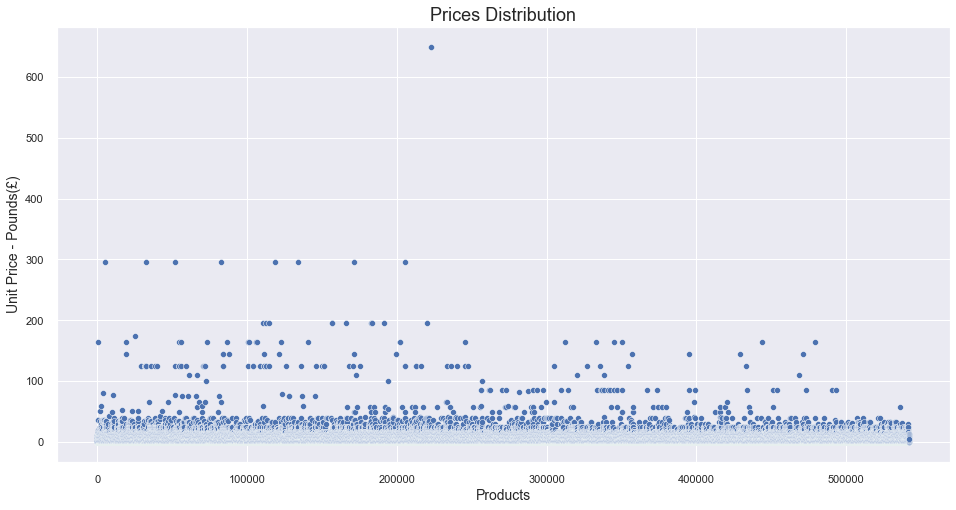

In [68]:
# Prices Distribution.

sns.scatterplot(x = df.index, y = df['UnitPrice'])
plt.title('Prices Distribution', fontsize = 18)
plt.xlabel('Products', fontsize = 14)
plt.ylabel('Unit Price - Pounds(£)', fontsize = 14);

### Not Sales Analysis

In [69]:
# df_not_sales description

df_not_sales['Description'].unique()

array(['POSTAGE', 'CARRIAGE', 'DOTCOM POSTAGE', 'Manual', 'Bank Charges',
       'AMAZON FEE', 'Adjust bad debt'], dtype=object)

In [70]:
df_not_sales.isna().sum()

CustomerID     766
Country          0
InvoiceDate      0
InvoiceNo        0
Description      0
UnitPrice        0
StockCode        0
Quantity         0
some_code        0
dtype: int64

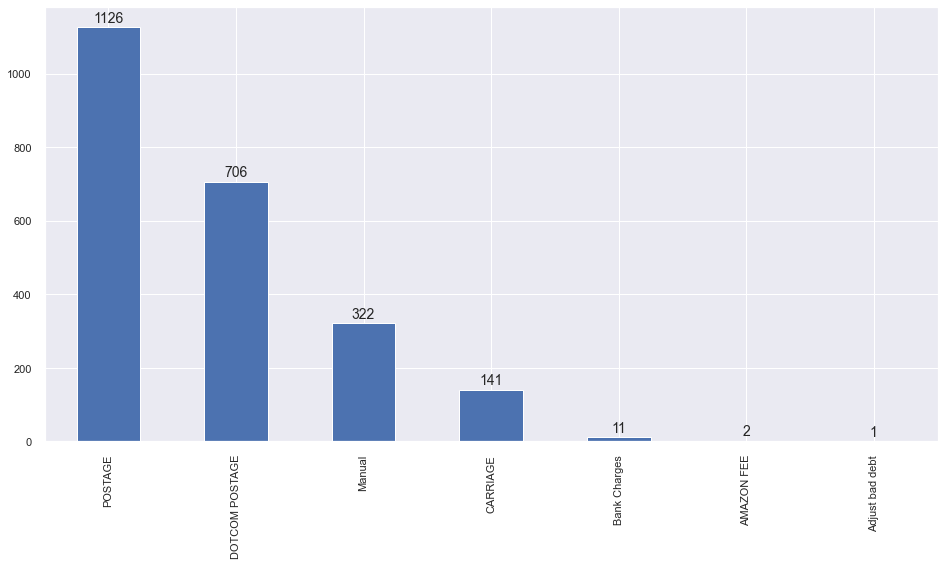

In [71]:
# df_not_sales description distribution

ax = df_not_sales['Description'].value_counts().plot(kind = 'bar')
annot_plot(ax)

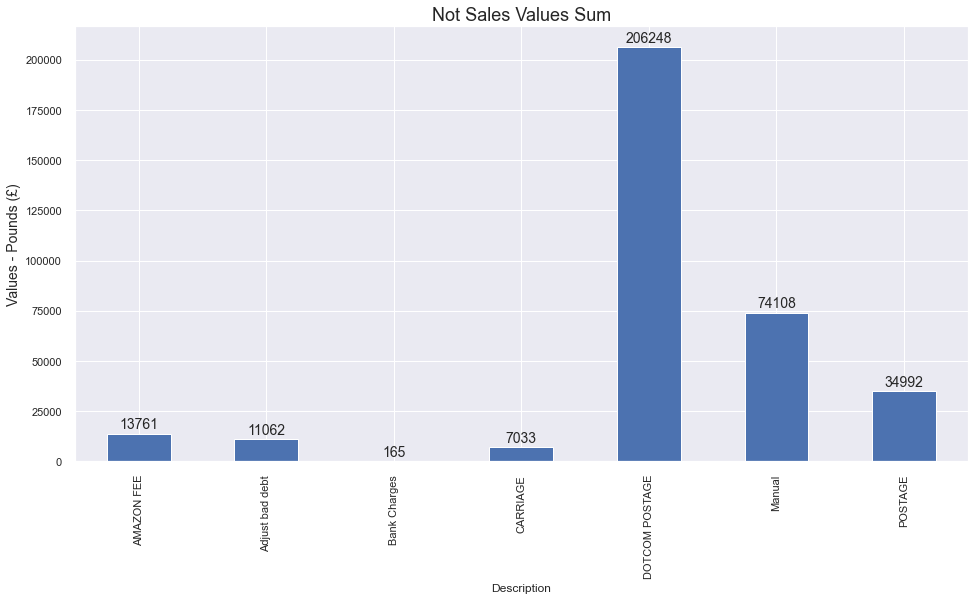

In [72]:
# df_not_sales 'Description' values.

ax = df_not_sales.groupby('Description')['UnitPrice'].sum().plot(kind = 'bar')
plt.title('Not Sales Values Sum', fontsize = 18)
plt.ylabel('Values - Pounds (£)', fontsize = 14)
annot_plot(ax)

### Actual Sales Analysis

In [73]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,391149.00,15295.17,1710.34,12346.00,13969.00,15159.00,16794.00,18287.00
InvoiceNo,522569.00,559962.10,13420.84,536365.00,547906.00,560689.00,571809.00,581587.00
UnitPrice,522569.00,3.28,4.40,0.04,1.25,2.08,4.13,649.50
Quantity,522569.00,10.64,156.59,1.00,1.00,4.00,12.00,80995.00
TotalValue,522569.00,19.61,269.93,0.06,3.90,9.90,17.70,168469.60
InvoiceYear,522569.00,2016.92,0.27,2016.00,2017.00,2017.00,2017.00,2017.00
InvoiceMonth,522569.00,7.49,3.50,1.00,5.00,8.00,11.00,12.00
InvoiceDayWeek,522569.00,2.66,2.13,0.00,1.00,2.00,5.00,6.00
days_since_last_purchase,522569.00,158.87,115.85,1.00,52.00,143.00,257.00,374.00


In [74]:
print(f'There are {len(df[df["Quantity"] < 0])} negative values, they are discounts and returns and has an impact on previously created features.')

There are 0 negative values, they are discounts and returns and has an impact on previously created features.


In [75]:
# Grouping Total Invoice values by year to get the mean sale by invoice by year

year_group_mean = df.groupby('InvoiceYear')['TotalValue'].mean()
year_group_mean = pd.DataFrame(year_group_mean)
year_group_mean.reset_index(inplace = True)
year_group_mean

,InvoiceYear,TotalValue
0,2016,19.00
1,2017,19.66


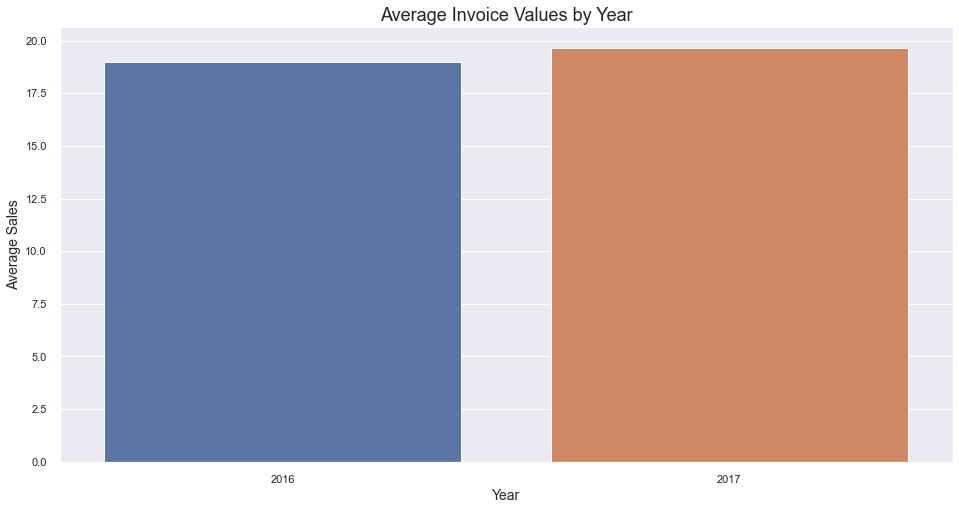

In [76]:
ax = sns.barplot(x = 'InvoiceYear', y = 'TotalValue',data = year_group_mean)
info_plot('Average Invoice Values by Year', 'Year', 'Average Sales')

In [77]:
# Grouping Total Sales by year 

year_group_sum = df.groupby('InvoiceYear')['TotalValue'].sum()
year_group_sum = pd.DataFrame(year_group_sum)
year_group_sum.reset_index(inplace = True)
year_group_sum

,InvoiceYear,TotalValue
0,2016,775714.95
1,2017,9472249.33


In [78]:
# Grouping by year and by month

df_byMonth = df.groupby(['InvoiceYear', 'InvoiceMonth'])['TotalValue'].sum()
df_byMonth = pd.DataFrame(df_byMonth)
df_byMonth.reset_index(inplace = True)
df_byMonth

# November 2016 - only 2 days of sales.
# December 2017 - only 7 days of sales.

,InvoiceYear,InvoiceMonth,TotalValue
0,2016,11,105038.75
1,2016,12,670676.20
2,2017,1,719104.18
3,2017,2,502201.30
4,2017,3,671649.94
5,2017,4,497506.19
6,2017,5,784946.06
7,2017,6,698951.08
8,2017,7,722230.94
9,2017,8,754086.87


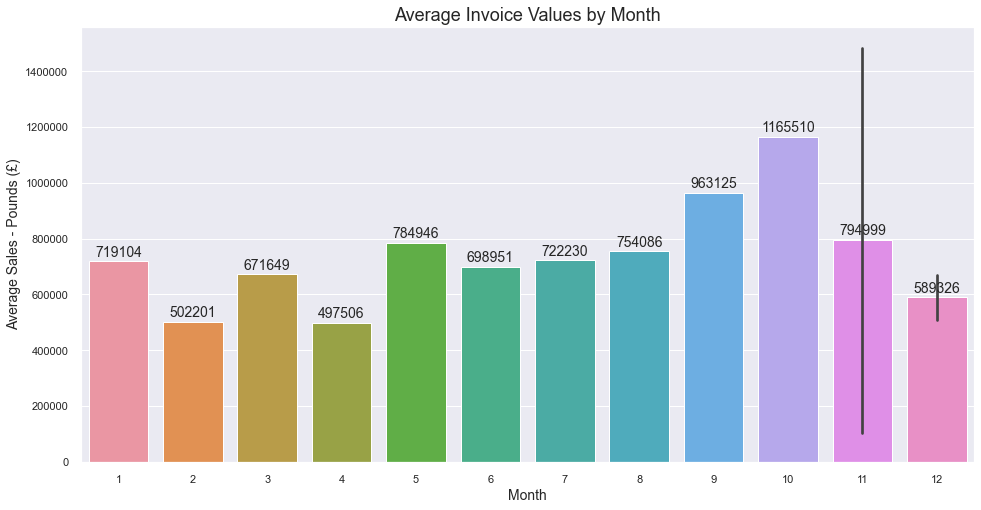

In [79]:
ax = sns.barplot(x = 'InvoiceMonth', y = 'TotalValue',data = df_byMonth)
info_plot('Average Invoice Values by Month', 'Month', 'Average Sales - Pounds (£)')
plt.ticklabel_format(style='plain', axis='y',useOffset=False)
annot_plot(ax)

In [80]:
# There are no fridays at the dataset.

df['InvoiceDayWeek'].unique()

array([1, 2, 3, 5, 6, 0], dtype=int64)

In [81]:
df['InvoiceDayWeek'].value_counts(sort = False)

0    98250
1    91073
2    99765
3    79235
5    62207
6    92039
Name: InvoiceDayWeek, dtype: int64

In [82]:
# Input Fridays values

friday = [{'InvoiceDayWeek': 4, 'TotalValue': 0, 'AVG_by_day': 0}]
friday = pd.DataFrame(friday)
friday

,InvoiceDayWeek,TotalValue,AVG_by_day
0,4,0,0


In [83]:
# groupng by day of week

df_by_DayOfWeek_group = df.groupby('InvoiceDayWeek')['TotalValue'].sum()
df_by_DayOfWeek = pd.DataFrame(df_by_DayOfWeek_group)
df_by_DayOfWeek.reset_index(inplace = True)
df_by_DayOfWeek['AVG_by_day'] = df.groupby('InvoiceDayWeek')['TotalValue'].mean().values

In [84]:
df_by_DayOfWeek = pd.concat([df_by_DayOfWeek, friday], sort = True)
# df_by_DayOfWeek.columns = ['InvoiceDayWeek', 'TotalValue', 'AVG_by_day']
df_by_DayOfWeek.sort_values(by = 'InvoiceDayWeek', inplace = True)

In [85]:
# There is none Fridays at the dataset.

df_by_DayOfWeek.reset_index(inplace = True, drop = True)
df_by_DayOfWeek

,AVG_by_day,InvoiceDayWeek,TotalValue
0,21.22,0,2085115.32
1,19.57,1,1782498.93
2,21.37,2,2131755.60
3,22.30,3,1767237.27
4,0.00,4,0.00
5,12.83,5,798307.60
6,18.29,6,1683049.56


In [86]:
df_by_DayOfWeek_group2 = df.groupby(['InvoiceDate', 'InvoiceDayWeek'])['TotalValue'].sum()
df_by_DayOfWeek2 = pd.DataFrame(df_by_DayOfWeek_group2)
df_by_DayOfWeek2.reset_index(inplace = True)

In [87]:
df_by_DayOfWeek2.head()

,InvoiceDate,InvoiceDayWeek,TotalValue
0,2016-11-29,1,57442.33
1,2016-11-30,2,47596.42
2,2016-12-01,3,44788.90
3,2016-12-03,5,30908.67
4,2016-12-04,6,51667.12


In [88]:
# Finding mean sales by day of week

df_by_DayOfWeek_group3 = df_by_DayOfWeek2.groupby('InvoiceDayWeek')['TotalValue'].mean()
df_by_DayOfWeek3 = pd.DataFrame(df_by_DayOfWeek_group3)
df_by_DayOfWeek3.reset_index(inplace = True)
df_by_DayOfWeek3 = pd.concat([df_by_DayOfWeek3, friday], sort = True)
df_by_DayOfWeek3.drop(columns = 'AVG_by_day', inplace = True)
df_by_DayOfWeek3.sort_values(by = 'InvoiceDayWeek', inplace = True)

In [89]:
df_by_DayOfWeek3.columns = ['InvoiceDayWeek', 'AVG_by_day']
df_by_DayOfWeek3

,InvoiceDayWeek,AVG_by_day
0,0,40098.37
1,1,33632.06
2,2,40221.80
3,3,35344.75
0,4,0.00
4,5,15966.15
5,6,35809.57


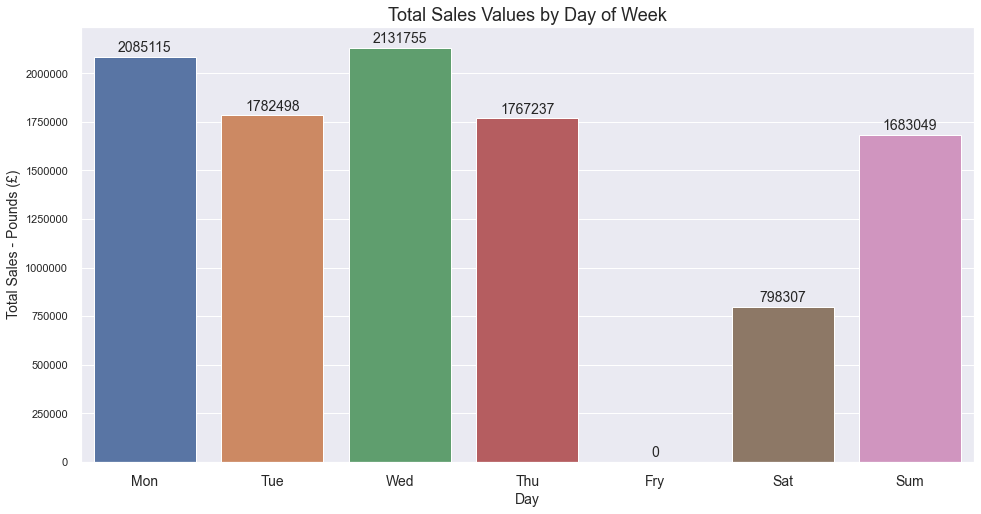

In [90]:
ax1 = sns.barplot(x = df_by_DayOfWeek['InvoiceDayWeek'], y = df_by_DayOfWeek['TotalValue'])
info_plot('Total Sales Values by Day of Week', 'Day', 'Total Sales - Pounds (£)')
plt.ticklabel_format(style='plain', axis='y',useOffset=False)
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Mon', 'Tue', 'Wed', 'Thu', 'Fry', 'Sat', 'Sum'], fontsize = 14)
annot_plot(ax1)

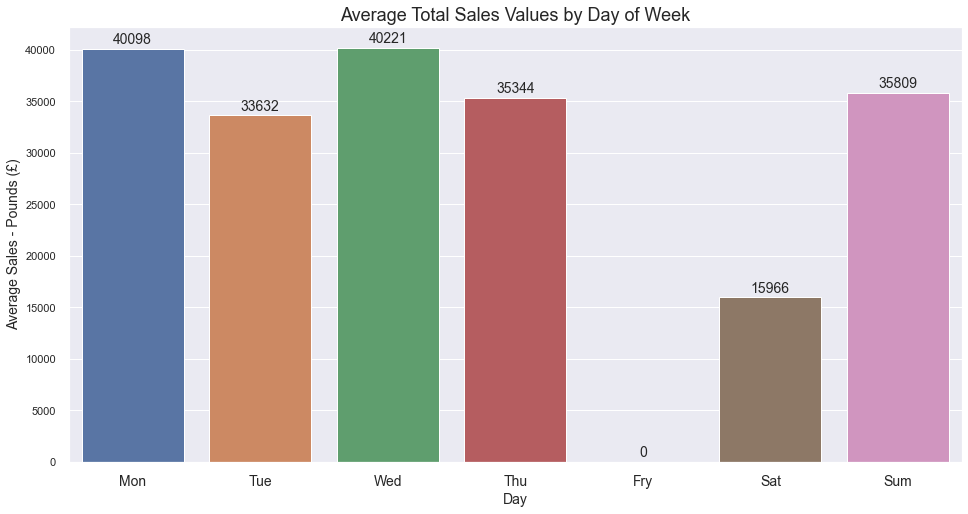

In [91]:
ax2 = sns.barplot(x = df_by_DayOfWeek3['InvoiceDayWeek'], y = df_by_DayOfWeek3['AVG_by_day'])
info_plot('Average Total Sales Values by Day of Week', 'Day', 'Average Sales - Pounds (£)')
plt.ticklabel_format(style='plain', axis='y',useOffset=False)
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Mon', 'Tue', 'Wed', 'Thu', 'Fry', 'Sat', 'Sum'], fontsize = 14)
annot_plot(ax2)

## Customer ID dataset

In [92]:
customer_report = ProfileReport(df_customer, 'Insiders Program Customer Dataset Report.')
customer_report

Summarize dataset:   0%|          | 0/16 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [93]:
# Saving the report to further use.

report.to_file(output_file = local_path + r'\df_customer_report.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

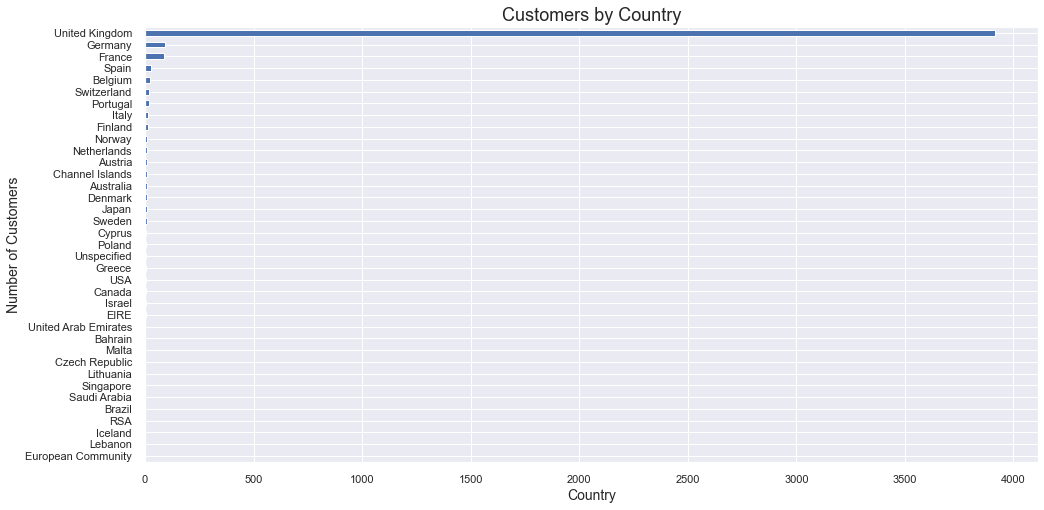

In [94]:
ax = df_customer.groupby('Country')['Country'].count().sort_values().plot(kind = 'barh')
info_plot('Customers by Country', 'Country', 'Number of Customers')
ax;

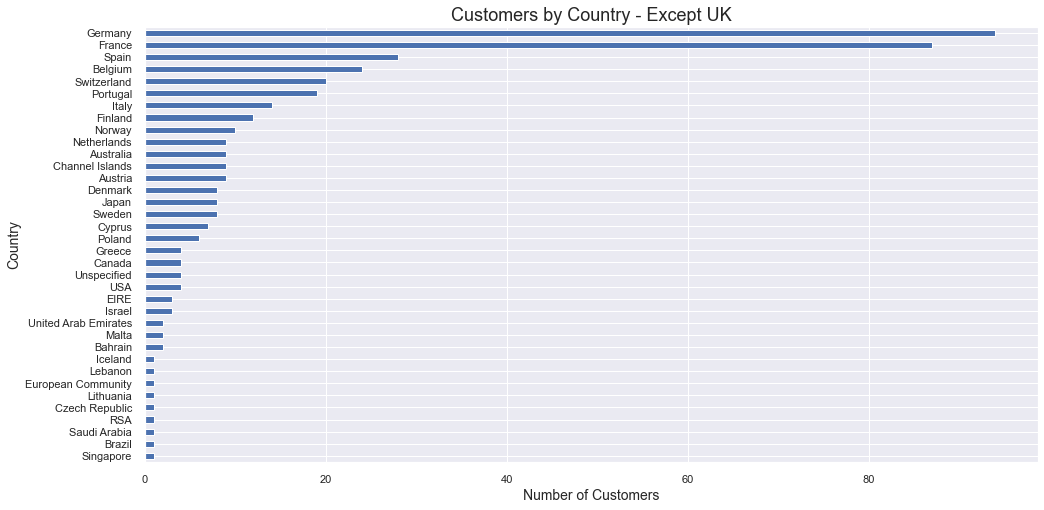

In [95]:
# Country with more customers - Except UK
df_customer_noUK = df_customer.query("Country != 'United Kingdom'")
df_customer_noUK.groupby('Country')['CustomerID'].count().sort_values().plot(kind = 'barh')
info_plot('Customers by Country - Except UK', 'Number of Customers', 'Country');


In [96]:
df_customer_noUK.head()

,CustomerID,Country,total_invoices,total_spend,total_itens_purchased,Avg_spend_by_invoice,last_purchase_(days)
2,12347.00,Iceland,182,4310.00,2458,23.68,3
3,12348.00,Finland,27,1437.24,2332,53.23,76
4,12349.00,Italy,72,1457.55,630,20.24,19
5,12350.00,Norway,16,294.40,196,18.40,311
6,12352.00,Norway,77,1385.74,526,18.00,37


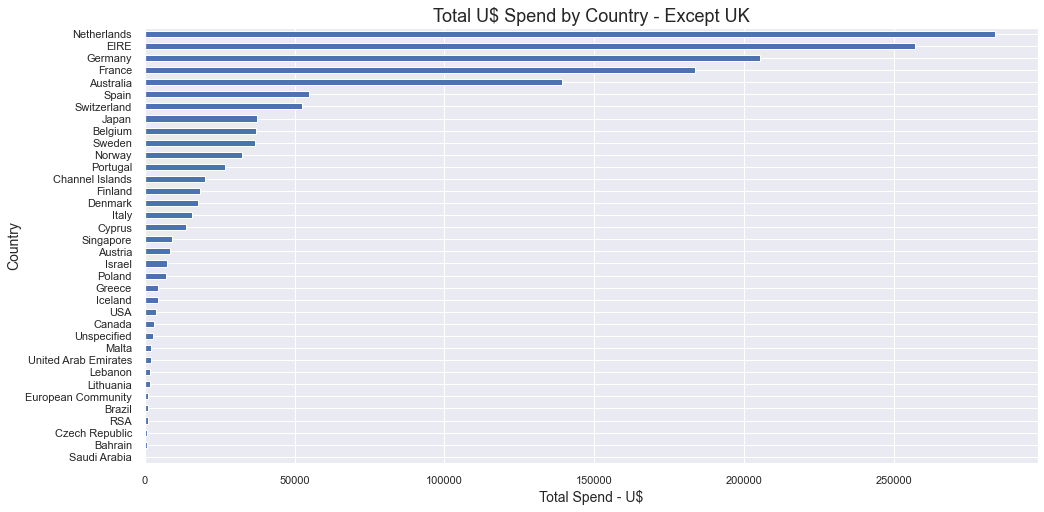

In [97]:
df_customer_noUK.groupby('Country')['total_spend'].sum().sort_values().plot(kind = 'barh')
info_plot('Total U$ Spend by Country - Except UK', 'Total Spend - U$', 'Country');

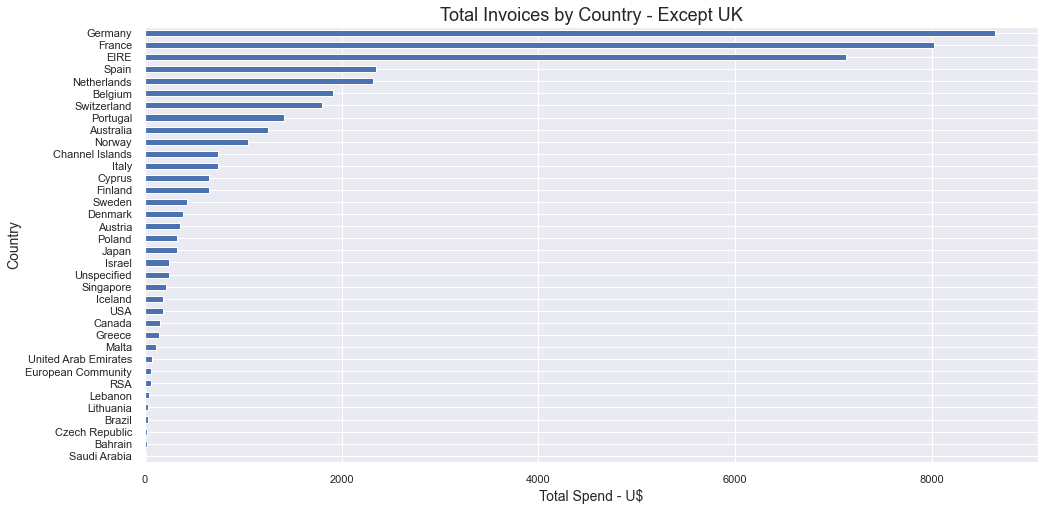

In [98]:
df_customer_noUK.groupby('Country')['total_invoices'].sum().sort_values().plot(kind = 'barh')
info_plot('Total Invoices by Country - Except UK', 'Total Spend - U$', 'Country');

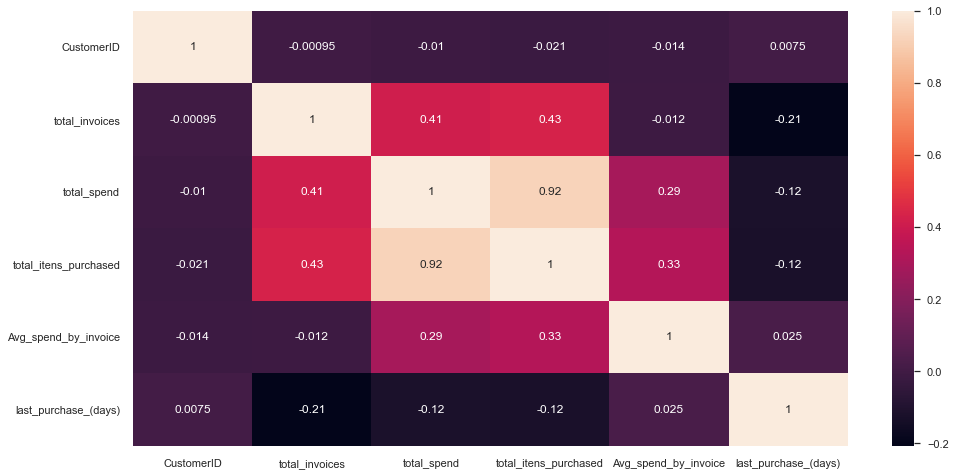

In [99]:
# Correlation

corr = df_customer.corr()
sns.heatmap(corr, annot = True);

# Data Preparation

In [100]:
df_customer_2 = df_customer.copy()
df_customer_2.head()

,CustomerID,Country,total_invoices,total_spend,total_itens_purchased,Avg_spend_by_invoice,last_purchase_(days)
1,12346.00,United Kingdom,1,77183.60,74215,77183.60,326
2,12347.00,Iceland,182,4310.00,2458,23.68,3
3,12348.00,Finland,27,1437.24,2332,53.23,76
4,12349.00,Italy,72,1457.55,630,20.24,19
5,12350.00,Norway,16,294.40,196,18.40,311


In [101]:
# Droping categorical features
df_customer_2.drop(columns = ['CustomerID', 'Country'],inplace = True)

## Robust Scaler

In [102]:
rscaler = RobustScaler()
df_customer_rscaler = rscaler.fit_transform(df_customer_2)

df_customer_rscaler = pd.DataFrame(columns=[df_customer_2.columns], data=df_customer_rscaler)

In [103]:
df_customer_rscaler.head(2)

,total_invoices,total_spend,total_itens_purchased,Avg_spend_by_invoice,last_purchase_(days)
0,-0.49,57.65,88.91,6240.46,2.20
1,1.74,2.75,2.51,0.49,-0.38


# Models Tests

## KMeans


### Model - MinMaxScaler

In [112]:
df_mms = df_customer_2.copy()

mms = MinMaxScaler()
df_customer_mms = mms.fit_transform(df_customer_2)

df_customer_mms = pd.DataFrame(columns=[df_customer_2.columns], data=df_customer_rscaler)

In [113]:
# Finding best K

k_clusters = [i for i in range(2, 10)]

silhouette_score_values = []
silhouette_score_values2 = []

for k in k_clusters:
    df_customer_Kmeans = KMeans(n_clusters = k, random_state=42, init='random', n_init=10, max_iter=10)
    labels = df_customer_Kmeans.fit_predict(df_customer_mms.values)
    silhouette_score_values.append(silhouette_score(df_customer_mms, labels))
    silhouette_score_values2.append([k, silhouette_score(df_customer_mms, labels)])

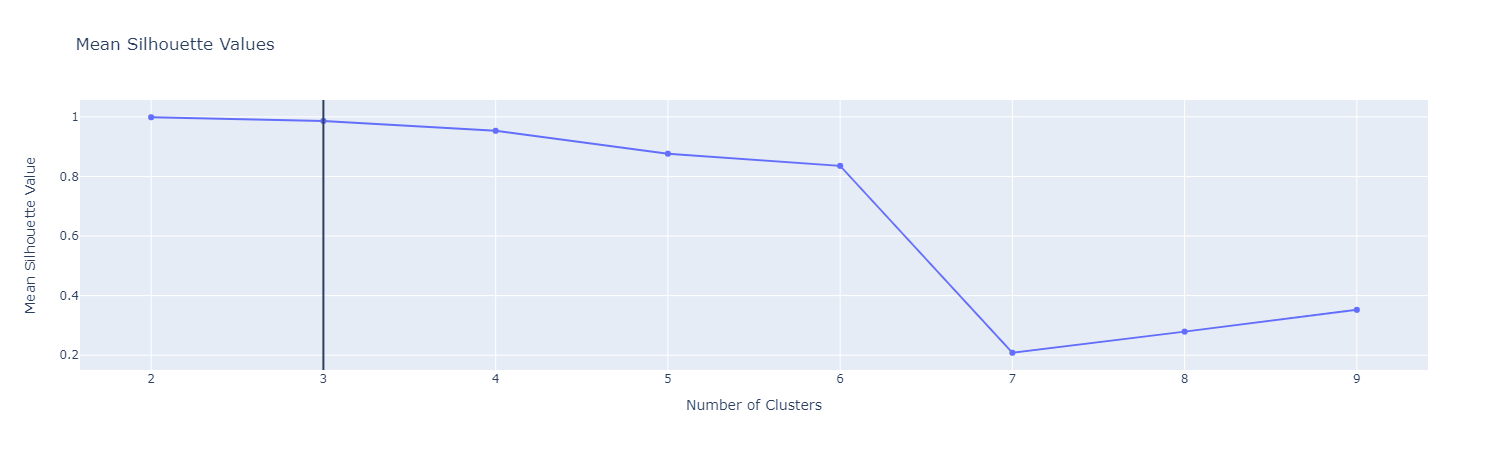

In [114]:
fig  = go.Figure()
fig.add_trace(go.Scatter(x = k_clusters, y = silhouette_score_values))

fig.update_layout(title = 'Mean Silhouette Values', xaxis_title = 'Number of Clusters', yaxis_title = 'Mean Silhouette Value')
fig.add_vline(x = 3)

fig.show()

In [115]:
# Best Silhouette Score value
df_customer_scaled_SC = pd.DataFrame(silhouette_score_values2, columns = ['K', 'silhouette_score'])
df_customer_scaled_SC.style.highlight_max(color = 'darkorange')

,K,silhouette_score
0,2,0.998601
1,3,0.986252
2,4,0.953154
3,5,0.876249
4,6,0.835489
5,7,0.208215
6,8,0.279119
7,9,0.352247


In [116]:
# Instancing model

k = 3

df_customer_Kmeans = KMeans(n_clusters = k, random_state=42, init='random', n_init=10, max_iter=300)
df_customer_Kmeans.fit(df_customer_scaled.values)
labels = df_customer_Kmeans.labels_

In [117]:
df_mms['clusters'] = labels

In [118]:
df_mms['clusters'].value_counts()

0    3230
2    1086
1      18
Name: clusters, dtype: int64

### Model - StandardScaler

In [104]:
df_customer_SS = df_customer_2.copy()

In [105]:
# Standard Scaler

scaler = StandardScaler()
df_customer_scaled = scaler.fit_transform(df_customer_SS)

df_customer_scaled = pd.DataFrame(columns=[df_customer_SS.columns], data=df_customer_scaled)

In [106]:
# Finding best K

k_clusters = [i for i in range(2, 10)]

silhouette_score_values = []
silhouette_score_values2 = []

for k in k_clusters:
    df_customer_Kmeans = KMeans(n_clusters = k, random_state=42, init='random', n_init=10, max_iter=10)
    labels = df_customer_Kmeans.fit_predict(df_customer_scaled.values)
    silhouette_score_values.append(silhouette_score(df_customer_scaled, labels))
    silhouette_score_values2.append([k, silhouette_score(df_customer_scaled, labels)])

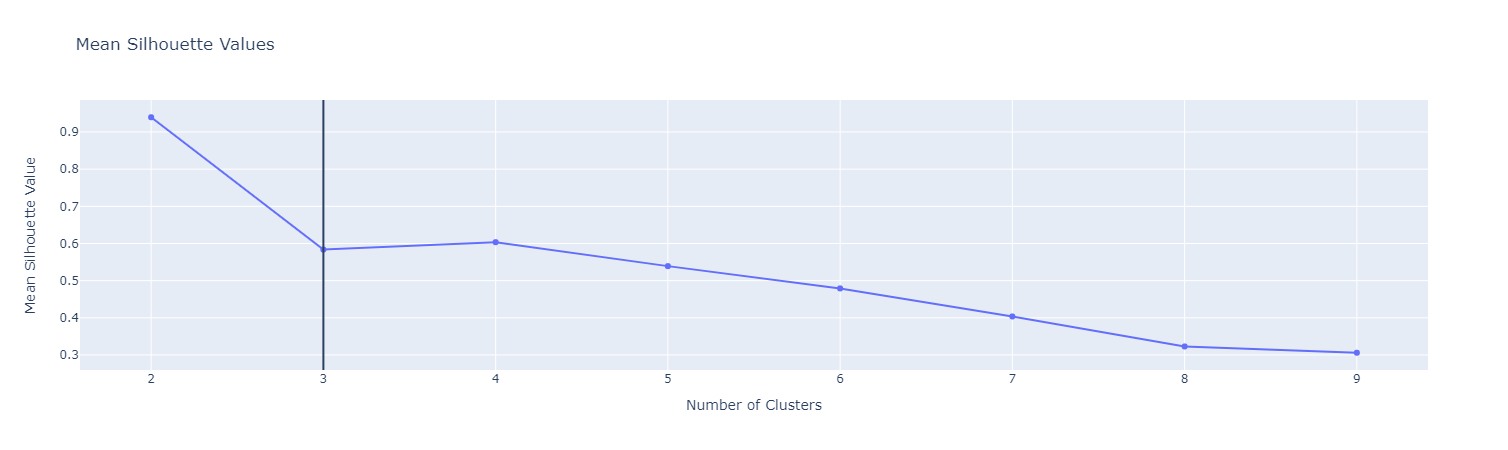

In [107]:
fig  = go.Figure()
fig.add_trace(go.Scatter(x = k_clusters, y = silhouette_score_values))

fig.update_layout(title = 'Mean Silhouette Values', xaxis_title = 'Number of Clusters', yaxis_title = 'Mean Silhouette Value')
fig.add_vline(x = 3)

fig.show()

In [108]:
# Best Silhouette Score value
df_customer_scaled_SC = pd.DataFrame(silhouette_score_values2, columns = ['K', 'silhouette_score'])
df_customer_scaled_SC.style.highlight_max(color = 'darkorange')

,K,silhouette_score
0,2,0.939638
1,3,0.583685
2,4,0.603514
3,5,0.539076
4,6,0.479150
5,7,0.403649
6,8,0.322929
7,9,0.306004


In [109]:
# Instancing model

k = 3

df_customer_Kmeans = KMeans(n_clusters = k, random_state=42, init='random', n_init=10, max_iter=300)
df_customer_Kmeans.fit(df_customer_scaled.values)
labels = df_customer_Kmeans.labels_

In [110]:
df_customer_SS['clusters'] = df_customer_Kmeans.predict(df_customer_scaled)

In [111]:
df_customer_scaled['clusters'].value_counts()

KeyError: 'clusters'

### Evaluation - StandardScaler

In [ ]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_customer_scaled) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=42, init='random', n_init=10, max_iter=300)
    cluster_labels = clusterer.fit_predict(df_customer_scaled)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_customer_scaled, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_customer_scaled, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df_customer_scaled.values[:, 0], df_customer_scaled.values[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [ ]:
sns.pairplot(df_customer_SS, hue = 'clusters')

In [ ]:
# WSS - Whitin-Cluster Sum of Square

print(f'WSS: {df_customer_Kmeans.inertia_}')

# Silhouette Score
print(f'SS: {silhouette_score(df_customer_scaled, df_customer_Kmeans.labels_)}')

# Davies-Bouldin Index
print(f'DBI: {davies_bouldin_score(df_customer_scaled, df_customer_Kmeans.labels_)}')

# Calinski Harabasz Index
print(f'CHI: {calinski_harabasz_score(df_customer_scaled, df_customer_Kmeans.labels_)}')

In [ ]:
# KMeans Evaluation 

df_kmeans_results = [{'Model': 'KMeans - StandardScaler', 
                  'WSS': 11810.1722,
                  'silhouette_score': 0.6879,
                  'davies_bouldin': 0.6996,
                  'calinski_harabasz': 2451.8785}]

df_kmeans_eval_ss = pd.DataFrame(df_kmeans_results)
df_kmeans_eval_ss                                                   

### Kmeans - Normalizer

In [ ]:
df_customer_Norm = df_customer_2.copy()

In [ ]:
# Normalization

normalize = Normalizer()
df_customer_norm = normalize.transform(df_customer_Norm)

df_customer_norm = pd.DataFrame(columns=[df_customer_Norm.columns], data=df_customer_norm)

In [ ]:
# Finding best K

k_clusters = [i for i in range(2, 10)]

silhouette_score_values = []
silhouette_score_values2 = []

for k in k_clusters:
    df_customer_Kmeans = KMeans(n_clusters = k, random_state=42, init='random', n_init=10, max_iter=10)
    labels = df_customer_Kmeans.fit_predict(df_customer_norm.values)
    silhouette_score_values.append(silhouette_score(df_customer_norm, labels))
    silhouette_score_values2.append([k, silhouette_score(df_customer_norm, labels)])

In [ ]:
fig  = go.Figure()
fig.add_trace(go.Scatter(x = k_clusters, y = silhouette_score_values))

fig.update_layout(title = 'Mean Silhouette Values', xaxis_title = 'Number of Clusters', yaxis_title = 'Mean Silhouette Value')
fig.add_vline(x = 3)

fig.show()

In [ ]:
# Best Silhouette Score value
df_customer_norm_SC = pd.DataFrame(silhouette_score_values2, columns = ['K', 'silhouette_score'])
df_customer_norm_SC.style.highlight_max(color = 'darkorange')

In [ ]:
# Instancing model

k = 3

df_customer_Kmeans = KMeans(n_clusters = k, random_state=42, init='random', n_init=10, max_iter=300)
df_customer_Kmeans.fit(df_customer_norm.values)
labels = df_customer_Kmeans.labels_

In [ ]:
df_customer_Norm['clusters'] = df_customer_Kmeans.predict(df_customer_norm)

In [ ]:
df_customer_Norm['clusters'].value_counts()

### Evaluation - Normalizer()

In [ ]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_customer_norm) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=42, init='random', n_init=10, max_iter=300)
    cluster_labels = clusterer.fit_predict(df_customer_norm)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_customer_norm, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_customer_norm, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df_customer_norm.values[:, 0], df_customer_norm.values[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [ ]:
sns.pairplot(df_customer_Norm, hue = 'clusters')

In [ ]:
# WSS - Whitin-Cluster Sum of Square

print(f'WSS: {df_customer_Kmeans.inertia_}')

# Silhouette Score
print(f'SS: {silhouette_score(df_customer_norm, df_customer_Kmeans.labels_)}')

# Davies-Bouldin Index
print(f'DBI: {davies_bouldin_score(df_customer_norm, df_customer_Kmeans.labels_)}')

# Calinski Harabasz Index
print(f'CHI: {calinski_harabasz_score(df_customer_norm, df_customer_Kmeans.labels_)}')

In [ ]:
# KMeans Evaluation 

df_kmeans_results = [{'Model': 'KMeans - Normalizer()', 
                  'WSS': 185.1553,
                  'silhouette_score': 0.3989,
                  'davies_bouldin': 0.9019,
                  'calinski_harabasz': 4580.9038}]

df_kmeans_eval_norm = pd.DataFrame(df_kmeans_results)
df_kmeans_eval_norm                                                  

### Kmeans - RobustScaler()

In [ ]:
df_customer_RS = df_customer_2.copy()

In [ ]:
# Normalization

normalize = RobustScaler()
df_customer_rs = normalize.fit_transform(df_customer_RS)

df_customer_rs = pd.DataFrame(columns=[df_customer_RS.columns], data=df_customer_rs)

In [ ]:
# Finding best K

k_clusters = [i for i in range(2, 10)]

silhouette_score_values = []
silhouette_score_values2 = []

for k in k_clusters:
    df_customer_Kmeans = KMeans(n_clusters = k, random_state=42, init='random', n_init=10, max_iter=10)
    labels = df_customer_Kmeans.fit_predict(df_customer_rs.values)
    silhouette_score_values.append(silhouette_score(df_customer_rs, labels))
    silhouette_score_values2.append([k, silhouette_score(df_customer_rs, labels)])

In [ ]:
fig  = go.Figure()
fig.add_trace(go.Scatter(x = k_clusters, y = silhouette_score_values))

fig.update_layout(title = 'Mean Silhouette Values', xaxis_title = 'Number of Clusters', yaxis_title = 'Mean Silhouette Value')
fig.add_vline(x = 7)

fig.show()

In [ ]:
# Best Silhouette Score value

df_customer_rs_SC = pd.DataFrame(silhouette_score_values2, columns = ['K', 'silhouette_score'])
df_customer_rs_SC.style.highlight_max(color = 'darkorange')

In [ ]:
# Instancing model

k = 3

df_customer_Kmeans = KMeans(n_clusters = k, random_state=42, init='random', n_init=10, max_iter=300)
df_customer_Kmeans.fit(df_customer_rs.values)
labels = df_customer_Kmeans.labels_

In [ ]:
df_customer_RS['clusters'] = df_customer_Kmeans.predict(df_customer_rs)

In [ ]:
df_customer_RS['clusters'].value_counts()

### Evaluation - RobustScaler()

In [ ]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_customer_rs) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=42, init='random', n_init=10, max_iter=300)
    cluster_labels = clusterer.fit_predict(df_customer_rs)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_customer_rs, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_customer_rs, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df_customer_rs.values[:, 0], df_customer_rs.values[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [ ]:
sns.pairplot(df_customer_RS, hue = 'clusters')

In [ ]:
# WSS - Whitin-Cluster Sum of Square

print(f'WSS: {df_customer_Kmeans.inertia_}')

# Silhouette Score
print(f'SS: {silhouette_score(df_customer_rs, df_customer_Kmeans.labels_)}')

# Davies-Bouldin Index
print(f'DBI: {davies_bouldin_score(df_customer_rs, df_customer_Kmeans.labels_)}')

# Calinski Harabasz Index
print(f'CHI: {calinski_harabasz_score(df_customer_rs, df_customer_Kmeans.labels_)}')

In [ ]:
# KMeans Evaluation 

df_kmeans_results = [{'Model': 'KMeans - Normalizer()', 
                  'WSS': 2433781.1214,
                  'silhouette_score': 0.9862,
                  'davies_bouldin': 0.4520,
                  'calinski_harabasz': 52576.7098}]

df_kmeans_eval_rs = pd.DataFrame(df_kmeans_results)
df_kmeans_eval_rs            

### Scalers Metrics Comparison

In [ ]:
df_kmeans_eval = df_kmeans_eval_ss.append(df_kmeans_eval_norm)
df_kmeans_eval = df_kmeans_eval.append(df_kmeans_eval_rs)
df_kmeans_eval

### KMeans Cluster Report

In [ ]:
df_customer['clusters'] = labels
df_customer.head()

In [ ]:
# Number of Customers
df_insiders_report_KMeans = df_customer[['CustomerID','clusters']].groupby('clusters').count().reset_index()
df_insiders_report_KMeans['perc_customer'] = 100 * (df_insiders_report_KMeans['CustomerID'] / df_insiders_report_KMeans['CustomerID'].sum())

# AVG Total_Spend
df_insiders_report_KMeans['AVG_total_spend'] = df_customer[['total_spend', 'clusters']].groupby('clusters').mean()

# AVG total_invoices
df_insiders_report_KMeans['AVG_total_invoices'] = df_customer[['total_invoices', 'clusters']].groupby('clusters').mean()

# AVG last_purchase
df_insiders_report_KMeans['AVG_last_purchase'] = df_customer[['last_purchase_(days)', 'clusters']].groupby('clusters').mean()

# AVG total_itens_purchased
df_insiders_report_KMeans['AVG_total_itens_purchased'] = df_customer[['total_itens_purchased', 'clusters']].groupby('clusters').mean()

In [ ]:
df_insiders_report_KMeans

### TSNE Visualization - KMeans

In [ ]:
# TSNE - high-dimensional visualize data.

tsne = TSNE(perplexity=26)

visualization = tsne.fit_transform(X = df_customer_scaled)

sns.scatterplot(x = visualization[:,0], y = visualization[:,1], hue = df_customer_Kmeans.labels_, palette = sns.color_palette('Set1', 3))

In [ ]:
df_customer[df_customer['clusters'] == 1]

In [ ]:
kmeans_cluster_analysis_list = []

for c in range(3):
    kmeans_cluster_analysis = {}
    kmeans_cluster_analysis['cluster'] = c
    kmeans_cluster_analysis['total_customers'] = len(df_customer[df_customer["clusters"] == c])
    kmeans_cluster_analysis['Max_total_invoices'] = df_customer[df_customer["clusters"] == c]["total_invoices"].max()
    kmeans_cluster_analysis['Min_total_invoices'] = df_customer[df_customer["clusters"] == c]["total_invoices"].min()
    kmeans_cluster_analysis['Max_total_spend'] = df_customer[df_customer["clusters"] == c]["total_spend"].max()
    kmeans_cluster_analysis['Min_total_spend'] = df_customer[df_customer["clusters"] == c]["total_spend"].min()
    kmeans_cluster_analysis['Max_total_itens_purchased'] = df_customer[df_customer["clusters"] == c]["total_itens_purchased"].max()
    kmeans_cluster_analysis['Min_total_itens_purchased'] = df_customer[df_customer["clusters"] == c]["total_itens_purchased"].min()
    kmeans_cluster_analysis['Max_Avg_spend_by_invoice'] = df_customer[df_customer["clusters"] == c]["Avg_spend_by_invoice"].max()
    kmeans_cluster_analysis['Min_Avg_spend_by_invoice'] = df_customer[df_customer["clusters"] == c]["Avg_spend_by_invoice"].min()
    kmeans_cluster_analysis['Max_last_purchase_(days)'] = df_customer[df_customer["clusters"] == c]["last_purchase_(days)"].max()
    kmeans_cluster_analysis['Min_last_purchase_(days)'] = df_customer[df_customer["clusters"] == c]["last_purchase_(days)"].min()
    kmeans_cluster_analysis_list.append(kmeans_cluster_analysis)

    

In [ ]:
df_kmeans_customer = pd.DataFrame(kmeans_cluster_analysis_list)
df_kmeans_customer

## DBSCAN

### Model

In [ ]:
dbscan_model = DBSCAN()
db_labels = dbscan_model.fit_predict(df_customer_scaled)

In [ ]:
np.unique(db_labels)

In [ ]:
df_customer_db = df_customer.copy()

In [ ]:
df_customer_db['clusters'] = db_labels
df_customer_db.head()

In [ ]:
sns.scatterplot(x = 'total_invoices', y = 'total_spend', hue = 'clusters', data = df_customer_db, palette = sns.color_palette('Set1', 5))

In [ ]:
# 3D plot DBSCAN

fig = go.Figure()
fig.add_trace(go.Scatter3d(x = df_customer_db['total_invoices'], y = df_customer_db['total_spend'], z = df_customer_db['Avg_spend_by_invoice'],
                          mode = 'markers', marker = dict(color = db_labels.astype(np.float)),
                          text = db_labels))

fig.show()

In [ ]:
# Fine Tunning DBSCAN

dbscan_model_tunned = DBSCAN(eps = 1.4, min_samples = 15)
db_labels_tunned = dbscan_model_tunned.fit_predict(df_customer_scaled)
np.unique(db_labels_tunned)

In [ ]:
# WSS - Whitin-Cluster Sum of Square

#print(f'WSS: {dbscan_model.inertia_}')

# Silhouette Score
print(f'SS: {silhouette_score(df_customer_scaled, dbscan_model_tunned.labels_)}')

# Davies-Bouldin Index
print(f'DBI: {davies_bouldin_score(df_customer_scaled, dbscan_model_tunned.labels_)}')

# Calinski Harabasz Index
print(f'CHI: {calinski_harabasz_score(df_customer_scaled, dbscan_model_tunned.labels_)}')

In [ ]:
df_customer_db_tunned = df_customer.copy()
df_customer_db_tunned['clusters'] = db_labels_tunned
df_customer_db_tunned.head()

In [ ]:
sns.color_palette("Paired")
sns.scatterplot(x = 'total_invoices', y = 'total_spend', hue = 'clusters', data = df_customer_db_tunned, palette = sns.color_palette('Set1', 3))

In [ ]:
# 3D plot DBSCAN

fig = go.Figure()
fig.add_trace(go.Scatter3d(x = df_customer_db_tunned['total_invoices'], y = df_customer_db_tunned['total_spend'], z = df_customer_db_tunned['Avg_spend_by_invoice'],
                          mode = 'markers', marker = dict(color = db_labels_tunned.astype(np.float)),
                          text = db_labels_tunned))

fig.show()

### Evaluation

In [ ]:
# WSS - Whitin-Cluster Sum of Square

#print(f'WSS: {dbscan_model.inertia_}')

# Silhouette Score
print(f'SS: {silhouette_score(df_customer_scaled, dbscan_model.labels_)}')

# Davies-Bouldin Index
print(f'DBI: {davies_bouldin_score(df_customer_scaled, dbscan_model.labels_)}')

# Calinski Harabasz Index
print(f'CHI: {calinski_harabasz_score(df_customer_scaled, dbscan_model.labels_)}')

In [ ]:
eps = [0.4, 0.6, 0.8, 1, 1.2, 1.4]
min_samples = [15, 20, 30, 40, 50]
SS_list = []
DBI_list = []
CH_list = []



for e in eps:
    for s in min_samples:
        dbscan_model = DBSCAN(eps = e, min_samples = s, n_jobs = -1)
        db_labels = dbscan_model.fit_predict(df_customer_scaled)
        SS_list.append([e, s, silhouette_score(df_customer_scaled, db_labels)])
        DBI_list.append([e, s, davies_bouldin_score(df_customer_scaled, db_labels)])
        CH_list.append([e, s, calinski_harabasz_score(df_customer_scaled, db_labels)])

In [ ]:
df_dbscan_ss = pd.DataFrame(SS_list, columns = ['eps', 'min_samples', 'silhouette_score'])

df_dbscan_dbi = pd.DataFrame(DBI_list, columns = ['eps', 'min_samples', 'davies_bouldin_index'])

df_dbscan_ch = pd.DataFrame(CH_list, columns = ['eps', 'min_samples', 'calisnki_harabasz'])

df_dbscan_search = pd.merge(df_dbscan_ss, df_dbscan_dbi, how = 'left', on = ['eps', 'min_samples'])

df_dbscan_search = pd.merge(df_dbscan_search, df_dbscan_ch, how = 'left', on = ['eps', 'min_samples'])

In [ ]:
df_dbscan_search.iloc[[10, 15, 20, 25]]

### DBSCAN Clusters Report

In [ ]:
df_customer_db_tunned.head()

In [ ]:
# Number of Customers
df_insiders_report_dbscan = df_customer_db_tunned[['CustomerID','clusters']].groupby('clusters').count().reset_index()
df_insiders_report_dbscan['perc_customer'] = 100 * (df_insiders_report_dbscan['CustomerID'] / df_insiders_report_dbscan['CustomerID'].sum())

# AVG Total_Spend
df_insiders_report_dbscan['AVG_total_spend'] = df_customer_db_tunned[['total_spend', 'clusters']].groupby('clusters').mean().reset_index()['total_spend']

# AVG total_invoices
df_insiders_report_dbscan['AVG_total_invoices'] = df_customer_db_tunned[['total_invoices', 'clusters']].groupby('clusters').mean().reset_index()['total_invoices']

# AVG last_purchase
df_insiders_report_dbscan['AVG_last_purchase'] = df_customer_db_tunned[['last_purchase_(days)', 'clusters']].groupby('clusters').mean().reset_index()['last_purchase_(days)']

# AVG total_itens_purchased
df_insiders_report_dbscan['AVG_total_itens_purchased'] = df_customer_db_tunned[['total_itens_purchased', 'clusters']].groupby('clusters').mean().reset_index()['total_itens_purchased']

In [ ]:
df_insiders_report_dbscan

### TSNE Visualization - DBSCAN

In [ ]:
# TSNE - high-dimensional visualize data.

tsne = TSNE(perplexity=34)

visualization = tsne.fit_transform(X = df_customer_scaled)

sns.scatterplot(x = visualization[:,0], y = visualization[:,1], hue = db_labels_tunned, palette = sns.color_palette('Set1', 3))

## Mean Shift


### Model 

In [ ]:
mean_shift_model = MeanShift()  
mean_shift_model.fit(df_customer_scaled)

np.unique(mean_shift_model.labels_)

In [ ]:
len(np.unique(mean_shift_model.labels_))

In [ ]:
# Estimate Bandwidth

BW = estimate_bandwidth(df_customer_scaled)
mean_shift_model_bw = MeanShift(BW)  
mean_shift_model_bw.fit(df_customer_scaled)

np.unique(mean_shift_model.labels_)

In [ ]:
# Best Estimate Bandwidth Quantile
'''
quantil_range = np.linspace(0.02, 0.5, 30)

silhouette_values = []
quantil_plot = []

for quantil in quantil_range:
    BW = estimate_bandwidth(df_customer_scaled, quantile = quantil)
    mean_shift_model_bw = MeanShift(BW)
    ms_labels = mean_shift_model_bw.fit_predict(df_customer_scaled)
    
    if (len(np.unique(labels)) < len(df_customer_scaled) and len(np.unique(labels)) > 1):
        mean_silhouette = silhouette_score(df_customer_scaled, ms_labels)
        silhouette_values.append(mean_silhouette)
        quantil_plot.append(quantil)
'''

In [ ]:
# Saving Best Estimate bandwidth Quantile Results

silhouette_values = [0.2819196002607263, 0.31746314194166314, 0.36512150006793104, 0.35925166402890873, 0.3019558512564802, 0.32983184470288435, 0.41816892914579706, 0.45848076543493893,
                     0.450106499806145, 0.4750346781789088, 0.5420544963823462, 0.6141255264360194, 0.6179733701433662, 0.650400253730069, 0.6561578641983468, 0.6557600404188438,
                     0.669449884095739, 0.6702749901170809, 0.6726847407019259, 0.6726847407019259, 0.6726847407019259, 0.6726847407019259, 0.6726847407019259, 0.6708050478251532,
                     0.6708050478251532, 0.6708050478251532, 0.6739858648114517, 0.6739858648114517, 0.6817991822214734, 0.681861958933829]

quantil_plot = [0.02, 0.036551724137931035, 0.05310344827586207, 0.06965517241379311, 0.08620689655172414, 0.10275862068965518, 0.11931034482758622, 0.13586206896551725, 0.15241379310344827,
                0.16896551724137931, 0.18551724137931033, 0.20206896551724138, 0.21862068965517242, 0.23517241379310344, 0.2517241379310345, 0.26827586206896553, 0.2848275862068966,
                0.3013793103448276, 0.31793103448275867, 0.33448275862068966, 0.3510344827586207, 0.36758620689655175, 0.3841379310344828, 0.40068965517241384, 0.4172413793103449,
                0.4337931034482759, 0.4503448275862069, 0.46689655172413796, 0.483448275862069, 0.5]

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = quantil_plot, y = silhouette_values))

fig.update_layout(dict(xaxis_title = 'Quantile', yaxis_title = 'Mean Silhouette'))

fig.show()

In [ ]:
np.unique(mean_shift_model.labels_)

In [ ]:
# Estimate Bandwidth

BW = estimate_bandwidth(df_customer_scaled, quantile = 0.5)
mean_shift_model_bw = MeanShift(BW)  
mean_shift_model_bw.fit(df_customer_scaled)

ms_predict = mean_shift_model_bw.predict(df_customer_scaled)

np.unique(mean_shift_model_bw.labels_)

### Evaluation

In [ ]:
# Means Shift Metrics

# Silhouette Score
print(f'SS: {silhouette_score(df_customer_scaled, mean_shift_model_bw.labels_)}')

# Davies-Bouldin Index
print(f'DBI: {davies_bouldin_score(df_customer_scaled, mean_shift_model_bw.labels_)}')

# Calinski Harabasz Index
print(f'CHI: {calinski_harabasz_score(df_customer_scaled, mean_shift_model_bw.labels_)}')

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(df_customer_scaled) + (len(np.unique(mean_shift_model_bw.labels_)) + 1) * 10])

silhouette_avg = silhouette_score(df_customer_scaled, mean_shift_model_bw.fit_predict(df_customer_scaled))
print(f"For n_clusters = {len(np.unique(mean_shift_model_bw.labels_))}.\n\nThe average silhouette_score is : {silhouette_avg}.")

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(df_customer_scaled, mean_shift_model_bw.fit_predict(df_customer_scaled))

y_lower = 10
for i in range(len(np.unique(mean_shift_model_bw.labels_))):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / len(np.unique(mean_shift_model_bw.labels_)))
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(mean_shift_model_bw.fit_predict(df_customer_scaled).astype(float) / len(np.unique(mean_shift_model_bw.labels_)))
ax2.scatter(df_customer_scaled.values[:, 0], df_customer_scaled.values[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

# Labeling the clusters
centers = mean_shift_model_bw.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle((f"Silhouette analysis for Mean Shift clustering. (n_clusters = {len(np.unique(mean_shift_model_bw.labels_))})"),fontsize=14, fontweight='bold')

plt.show()

### Mean Shift Clusters Report

In [ ]:
df_mean_shift = df_customer_db_tunned.copy()
df_mean_shift['clusters'] = mean_shift_model.fit_predict(df_customer_scaled)

In [ ]:
# Number of Customers
df_insiders_report_mean_shift = df_mean_shift[['CustomerID','clusters']].groupby('clusters').count().reset_index()
df_insiders_report_mean_shift['perc_customer'] = 100 * (df_insiders_report_mean_shift['CustomerID'] / df_insiders_report_mean_shift['CustomerID'].sum())

# AVG Total_Spend
df_insiders_report_mean_shift['AVG_total_spend'] = df_mean_shift[['total_spend', 'clusters']].groupby('clusters').mean().reset_index()['total_spend']

# AVG total_invoices
df_insiders_report_mean_shift['AVG_total_invoices'] = df_mean_shift[['total_invoices', 'clusters']].groupby('clusters').mean().reset_index()['total_invoices']

# AVG last_purchase
df_insiders_report_mean_shift['AVG_last_purchase'] = df_mean_shift[['last_purchase_(days)', 'clusters']].groupby('clusters').mean().reset_index()['last_purchase_(days)']

# AVG total_itens_purchased
df_insiders_report_mean_shift['AVG_total_itens_purchased'] = df_mean_shift[['total_itens_purchased', 'clusters']].groupby('clusters').mean().reset_index()['total_itens_purchased']

In [ ]:
df_insiders_report_mean_shift

### TSNE Visualization - Mean Shift

In [ ]:
# TSNE - high-dimensional visualize data.

tsne = TSNE(perplexity=40)

visualization = tsne.fit_transform(X = df_customer_scaled)

sns.scatterplot(x = visualization[:,0], y = visualization[:,1], hue = mean_shift_model.labels_, palette = sns.color_palette('Set1', 45))

# Best Model

In [ ]:
evaluation_dict = [
    {
        'Model':'KMeans', 'Number of cluesters': len(df_insiders_report_KMeans["clusters"]), 'Mean Silhouette Score':  silhouette_score(df_customer_scaled, df_customer_Kmeans.labels_),
        'Davies-Boudin Index': davies_bouldin_score(df_customer_scaled, df_customer_Kmeans.labels_), 'Calinski Harabasz Index': calinski_harabasz_score(df_customer_scaled, df_customer_Kmeans.labels_)
    },
    {
        'Model': 'DBSCAN', 'Number of cluesters': len(df_insiders_report_dbscan["clusters"]), 'Mean Silhouette Score':   silhouette_score(df_customer_scaled, dbscan_model.labels_),
        'Davies-Boudin Index': davies_bouldin_score(df_customer_scaled, dbscan_model.labels_), 'Calinski Harabasz Index': calinski_harabasz_score(df_customer_scaled, dbscan_model.labels_)
    },
    {
        'Model': 'Mean Shift', 'Number of cluesters': len(df_insiders_report_mean_shift["clusters"]), 'Mean Silhouette Score': silhouette_score(df_customer_scaled, mean_shift_model_bw.labels_),
        'Davies-Boudin Index': davies_bouldin_score(df_customer_scaled, mean_shift_model_bw.labels_), 'Calinski Harabasz Index': calinski_harabasz_score(df_customer_scaled, mean_shift_model_bw.labels_)
    }
]

df_model_evaluation = pd.DataFrame(evaluation_dict)

In [ ]:
df_model_evaluation

In [ ]:
# kmeans, DBSCAN, Mean Shift clusters descriptionf

display(df_insiders_report_KMeans, '-'*105)
display(df_insiders_report_dbscan, '-'*105)
display(df_insiders_report_mean_shift, '-'*105)

# Cluster Analysis

# Deploy to Production

# Work Diary

30/03/2021 - Kick off PA05.

    - done data load.
    - done first look at the data.
    - done some data cleaning.
        - found some issues with NaN in the data.
        
            - InvoiceNo.
            - CustomerID.
            - Description.
            

31/03/2021 - Git config + ClientID NaN problem.

    - Done GitLab configurations.
    - Openned my branch at GitLab repo.
    
    - Try to figure out how to use the NaN CustomerID - I do not want to drop them.
        - had an idea - use the Invoice Number to relate the purchases with the NaN clients, so we can input a clientID for each Invoice Number.
            - We can input the new CustomerID numbers above the CustomerID.max() - 18287.0 - but it can also create fake clients.
            - (01/04 - After some analysis, it was understood that the NaN values at the columns CustomerID and Description are not relevant for the future clustering model training. 
            It was decided to mantein the rows with NaN values.

01/04/2021 - More Data Cleaning.

    - Solved the "InvoiceNo" issue.

02/04/2021 - Finished first cicle of Data Cleaning.

    - Found a lot of data that did not correspond to sales itself.
    - Found some data as shipping charges, taxes, postage... They were all excluded, i tried to maintain only actual sales at the dataset.

06/04/2021 - returned to data cleaning.

    - Weekly 01 - After some considerations was observed that negative sales quantities are actually devolutions, and this data is important. I've returned them to the dataset.
    - the notebook "c1.0-fdv-end-to-end-clustering-W1" was duplicated in order to mantein the previous work. It meybe useful.

07/04/2021 - Still data cleaning.

    - Done some notebook organization.
    - Returned the negative sales quantityes back to the dataset.

10/04/2021 - Feature Enginnering

    - Done some feature enginnering.
    - Builded RFM model.

12/04/2021 - EDA

    - Back to EDA.
    - Done some graphs.
    - Discovered that there are no Fridays in the dataset.     

13/04/2021 - EDA

    - Done some more EDA.
    - I found that there are no Fridays in the data set.
    
    - Weekly 2 - Clustering Metrics.
        - Find best K for kmeans - Yellowbrick Method.
        - WSS.
        - Silhouette Score.

17/04/2021 - Some modeling tests

    - Done some modeling tests into RFM dataset - KMEans, DBSCAN.
    - Done metrics evaluation.

18/04/2021 - RFM Models Evaluation

    - Done some metrics evaluation on RFM Models (kMeans, DBSCAN, Mean Shift).
    - Accordingly to the metrics evaluarion, the best model to use on RFM dataset (with no fine tunning) is Mean Shift, it has the best Silhouette Score and Davies-Boulding Index and the secon best Calinski Harabasz Index.
    
    - From now on I'll use the original dataset (prepared).

19/04/2021 - Done some Feature Enginnering

    - Created df_customer - df grouped by customer.
    
 
19/04/2021 - Done Some Data Preparation.

    - Done StandardScaler with df_customer dataset.
    - Done some tests with KMeans.

20/04/2021 - Weekly 3

    - Finished KMeans on clustomer dataset
    
|   cluster |   total_clients |   percentage |   AVG_total_spend |   AVG_total_invoices |   AVG_last_purchase |   AVG_total_itens_purchased |
|-----------:|-------------:|----------------:|------------------:|---------------------:|--------------------:|----------------------------:|
|          0 |         3249 |       74.4842   |          1879.35  |             102.707  |            40.6811  |                    1132.48  |
|          1 |           15 |        0.343879 |        106702     |            2404      |             5.13333 |                   60238     |
|          2 |         1098 |       25.1719   |           503.867 |              27.3005 |           247.852   |                     264.652 |

21/04/2021 - DBSCAN

    - Done some tests with DBSCAN algorithm.

22 - 23/04/2021 - Means Shift + TSNE

24/04/2021 - Final Model Evaluation.

    - Done models evaluation
|    | Model   |   Number of cluesters |   Mean Silhouette Score |   Davies-Boudin Index |   Calinski Harabasz Index |
|---:|:--------|----------------------:|------------------------:|----------------------:|--------------------------:|
|  0 | KMeans  |                     3 |                0.687916 |              0.699619 |                   2451.88 |
|  1 | DBSCAN  |                     3 |                0.697424 |              1.1763   |                   1856.52 |
|  2 | Mean Shift  |                    45 |                0.681862 |              0.428226 |                   1077.66 |

    - KMeans with n_clusters = 3 was chose as the best model to use in this case.